# Employed Persons by Major Occupation, by Region, by Sex

#### <span style="color:purple;"><strong>GROUP 9: Barte | Gayapa | Gorospe | Javier </strong></span>
---

### 🔎 Background of the Dataset

> This dataset captures the employment distribution across different geolocations and occupations over multiple years and quarters. It includes the number of employment that is gender-based, which could assess and determine the trends, labor market analysis, and workforce totality within the specific occupations in the Philippines.

### Source of Data and its Role

> The dataset was retrieved from the Philippine Statistics Authority (PSA), https://openstat.psa.gov.ph. It is from the collection under Labor and Employment, specifically the Labor Force Survey (LFS) conducted regularly to gather key labor market indicators in the Philippines.

### Dataset Content

> This dataset provides a comprehensive overview of employment trends in the Philippines, offering insights into workforce distribution across various regions and industries.

Key Features:
- Geolocation - Name of the region
- Major Occupation - Job classification or Industry Sector
- Year - The year when the data was recorded
- Quarter Employment - Employment Statistics that are recorded quarterly
- Female - Number of Female employees in the certain region and occupation
- Male - Number of Male employees in the certain region and occupation’

> This dataset provides an important resource for analyzing trends in the labor market, the distribution of gender in the workforce, and the dynamics of employment across different regions.

### Participants in the Dataset

> This dataset represents employment statistics covering various occupations across multiple geographic locations and job sectors in the Philippines. It encompasses people involved in a variety of sectors, grouped into different occupational categories.

Occupational Classifications:
- Managers – Individuals tasked with planning, guiding, and managing operations within organizations.
- Professionals – Workers in specialized areas that necessitate higher education, including engineers, educators, and healthcare practitioners.
- Technicians and Associate Professionals – Individuals offering technical assistance in scientific, engineering, or medical disciplines.
- Clerical Support Workers – Staff responsible for administrative functions such as record maintenance, data entry, and customer service.
- Service and Sales Workers – Individuals engaged in roles related to customer service, retail, hospitality, and other service-based fields.  
- Skilled Agricultural, Forestry, and Fishery Workers – People involved in occupations related to farming, fishing, and forestry.  
- Craft and Related Trades Workers – Skilled tradespeople focusing on construction, repair, and production tasks.  
- Plant and Machine Operators and Assemblers – Workers operating industrial machinery, manufacturing devices, and assembly lines.  
- Elementary Occupations – Employees carrying out basic tasks that require little formal training, such as laborers and maintenance staff.  
- Armed Forces Occupations – Members serving in military and defense-related positions.

---

### **Data Import & Exploration**

**Import Statements**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

**Loading the Dataset**

In [4]:
# Loads the dataset
# df = pd.read_csv("data/Employed Persons by Major Occupation.csv", skiprows=1)
df = pd.read_csv("data/Employed Persons by Major Occupation.csv")


df.head(5)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
0,PHILIPPINES,Managers,3244.009,3541.049,3093.180,3447.790,2953.884,3474.612,3186.420,3411.726,...,1548.065,1553.296,1545.165,1765.796,1295.256,1754.707,1675.830,1570.561,1055.854,788.437
1,PHILIPPINES,Professionals,808.350,1394.646,828.457,1370.048,778.785,1463.795,830.533,1495.911,...,782.403,1761.261,805.840,1235.408,810.259,1454.679,921.547,1833.471,834.477,1677.566
2,PHILIPPINES,Technicians and Associate Professionals,807.865,727.165,882.455,799.696,916.109,873.420,829.729,813.605,...,891.606,788.750,715.896,897.911,819.012,688.582,911.037,899.234,857.480,941.969
3,PHILIPPINES,Clerical Support Workers,915.972,1430.902,939.934,1464.776,966.424,1364.978,1054.992,1418.932,...,1123.189,1673.830,1122.985,1795.191,1241.779,1836.890,1416.957,1645.740,1306.441,1969.136
4,PHILIPPINES,Service and Sales Workers,2889.855,3265.865,2812.570,3243.550,2826.910,3295.546,2875.541,3474.015,...,3693.635,5963.519,3336.237,5495.375,3176.499,5481.377,3551.249,5134.454,3855.617,6516.319


**Data Dictionary**

In [ ]:
# Creating the data dictionary
data_dict = {
    "Column Name": [
        "Geolocation", "Major Occupation",
        "2018 January Male", "2018 January Female",
        "2018 April Male", "2018 April Female",
        "2018 July Male", "2018 July Female",
        "2018 October Male", "2018 October Female",
        "2018 Annual Male", "2018 Annual Female",
        "2018 February Male", "2018 February Female",
        "2018 March Male", "2018 March Female",
        "2018 May Male", "2018 May Female",
        "2018 June Male", "2018 June Female",
        "2018 August Male", "2018 August Female",
        "2018 September Male", "2018 September Female",
        "2018 November Male", "2018 November Female",
        "2018 December Male", "2018 December Female",
        "2019 January Male", "2019 January Female",
        "2019 April Male", "2019 April Female",
        "2019 July Male", "2019 July Female",
        "2019 October Male", "2019 October Female",
        "2019 Annual Male", "2019 Annual Female",
        "2019 February Male", "2019 February Female",
        "2019 March Male", "2019 March Female",
        "2019 May Male", "2019 May Female",
        "2019 June Male", "2019 June Female",
        "2019 August Male", "2019 August Female",
        "2019 September Male", "2019 September Female",
        "2019 November Male", "2019 November Female",
        "2019 December Male", "2019 December Female",
        "2020 January Male", "2020 January Female",
        "2020 April Male", "2020 April Female",
        "2020 July Male", "2020 July Female",
        "2020 October Male", "2020 October Female",
        "2020 Annual Male", "2020 Annual Female",
        "2020 February Male", "2020 February Female",
        "2020 March Male", "2020 March Female",
        "2020 May Male", "2020 May Female",
        "2020 June Male", "2020 June Female",
        "2020 August Male", "2020 August Female",
        "2020 September Male", "2020 September Female",
        "2020 November Male", "2020 November Female",
        "2020 December Male", "2020 December Female",
        "2021 January Male", "2021 January Female",
        "2021 April Male", "2021 April Female",
        "2021 July Male", "2021 July Female",
        "2021 October Male", "2021 October Female",
        "2021 Annual Male", "2021 Annual Female",
        "2021 February Male", "2021 February Female",
        "2021 March Male", "2021 March Female",
        "2021 May Male", "2021 May Female",
        "2021 June Male", "2021 June Female",
        "2021 August Male", "2021 August Female",
        "2021 September Male", "2021 September Female",
        "2021 November Male", "2021 November Female",
        "2021 December Male", "2021 December Female"
    ],
    "Data Type": [
        "String", "String",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float"
    ],
    "Description": [
        "Geographic location", "Primary job category",
        "Total males in January 2018", "Total females in January 2018",
        "Total males in April 2018", "Total females in April 2018",
        "Total males in July 2018", "Total females in July 2018",
        "Total males in October 2018", "Total females in October 2018",
        "Total annual males in 2018", "Total annual females in 2018",
        "Total males in February 2018", "Total females in February 2018",
        "Total males in March 2018", "Total females in March 2018",
        "Total males in May 2018", "Total females in May 2018",
        "Total males in June 2018", "Total females in June 2018",
        "Total males in August 2018", "Total females in August 2018",
        "Total males in September 2018", "Total females in September 2018",
        "Total males in November 2018", "Total females in November 2018",
        "Total males in December 2018", "Total females in December 2018",
        "Total males in January 2019", "Total females in January 2019",
        "Total males in April 2019", "Total females in April 2019",
        "Total males in July 2019", "Total females in July 2019",
        "Total males in October 2019", "Total females in October 2019",
        "Total annual males in 2019", "Total annual females in 2019",
        "Total males in February 2019", "Total females in February 2019",
        "Total males in March 2019", "Total females in March 2019",
        "Total males in May 2019", "Total females in May 2019",
        "Total males in June 2019", "Total females in June 2019",
        "Total males in August 2019", "Total females in August 2019",
        "Total males in September 2019", "Total females in September 2019",
        "Total males in November 2019", "Total females in November 2019",
        "Total males in December 2019", "Total females in December 2019",
        "Total males in January 2020", "Total females in January 2020",
        "Total males in April 2020", "Total females in April 2020",
        "Total males in July 2020", "Total females in July 2020",
        "Total males in October 2020", "Total females in October 2020",
        "Total annual males in 2020", "Total annual females in 2020",
        "Total males in February 2020", "Total females in February 2020",
        "Total males in March 2020", "Total females in March 2020",
        "Total males in May 2020", "Total females in May 2020",
        "Total males in June 2020", "Total females in June 2020",
        "Total males in August 2020", "Total females in August 2020",
        "Total males in September 2020", "Total females in September 2020",
        "Total males in November 2020", "Total females in November 2020",
        "Total males in December 2020", "Total females in December 2020",
        "Total males in January 2021", "Total females in January 2021",
        "Total males in April 2021", "Total females in April 2021",
        "Total males in July 2021", "Total females in July 2021",
        "Total males in October 2021", "Total females in October 2021",
        "Total annual males in 2021", "Total annual females in 2021",
        "Total males in February 2021", "Total females in February 2021",
        "Total males in March 2021", "Total females in March 2021",
        "Total males in May 2021", "Total females in May 2021",
        "Total males in June 2021", "Total females in June 2021",
        "Total males in August 2021", "Total females in August 2021",
        "Total males in September 2021", "Total females in September 2021",
        "Total males in November 2021", "Total females in November 2021",
        "Total males in December 2021", "Total females in December 2021"
    ]
}

# Create a DataFrame
data_dictionary_df = pd.DataFrame(data_dict)

# Apply borders using Styler
styled_df = data_dictionary_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
styled_df

,Column Name,Data Type,Description
0,Geolocation,String,Geographic location
1,Major Occupation,String,Primary job category
2,2018 January Male,Float,Total males in January 2018
3,2018 January Female,Float,Total females in January 2018
4,2018 April Male,Float,Total males in April 2018
5,2018 April Female,Float,Total females in April 2018
6,2018 July Male,Float,Total males in July 2018
7,2018 July Female,Float,Total females in July 2018
8,2018 October Male,Float,Total males in October 2018
9,2018 October Female,Float,Total females in October 2018


### **Identifying Data and Attributes**

**Data Information**

In [ ]:
# Display information about the dataframe
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 106 entries, Geolocation to 2021 December Female
dtypes: float64(54), object(52)
memory usage: 149.2+ KB


**Statistical Information**

In [ ]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,2018 Annual Male,2018 Annual Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,286.224500,177.720333,281.191100,173.213111,278.682311,172.981144,283.871400,175.295522,282.492467,174.802644,...,297.794633,203.045717,294.286744,197.169283,291.384839,192.981022,301.172472,204.097350,302.359511,211.801256
std,765.388149,488.749150,739.853072,470.000115,736.139526,467.101254,748.510382,476.663619,747.087917,475.209177,...,837.333927,610.755105,824.488489,570.802056,814.115787,569.406934,825.418421,549.036953,843.121618,662.931232
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.234000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.162000,12.672500,30.193500,16.728500,30.115250,18.308250,28.958750,14.158000,29.456750,15.761500,...,31.997750,14.495000,28.968750,16.236500,30.429750,10.571500,24.625000,11.559250,27.748500,12.044500
50%,91.079500,52.575500,93.261000,47.035500,92.208000,48.457000,95.468000,49.823500,91.211500,51.611500,...,86.426500,51.208500,86.554000,52.366000,94.420500,55.953500,90.824000,60.204000,88.536500,47.925000
75%,279.085750,164.736250,254.195250,153.616000,245.836500,156.221500,267.223000,159.288000,268.632750,158.901250,...,252.068500,167.888250,251.036250,154.524750,229.442500,154.038750,260.464000,173.603750,271.491500,172.447500
max,7570.992000,3965.169000,7237.707000,3635.600000,7357.368000,3481.280000,7399.804000,3590.215000,7391.468000,3668.066000,...,8772.099000,5963.519000,8527.687000,5495.375000,8484.496000,5481.377000,8553.933000,5134.454000,8494.912000,6516.319000


**Dataset Column Names and its Data Type**

In [5]:
# Display data column names and its data type of the dataframe
col_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes
})

display(col_info.style.hide(axis='index'))

Column Name,Data Type
Geolocation,object
Major Occupation,object
2018 January Male,float64
2018 January Female,float64
2018 April Male,float64
2018 April Female,float64
2018 July Male,float64
2018 July Female,float64
2018 October Male,float64
2018 October Female,float64


In [7]:
# Function to check data types
def check_data_types(df):
    numerical_columns = []
    categorical_columns = []
    mixed_columns = []

    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            numerical_columns.append(column)
        elif df[column].dtype == 'object':
            categorical_columns.append(column)
        else:
            mixed_columns.append(column)

    return {
        'Numerical': numerical_columns,
        'Categorical': categorical_columns,
        'Mixed': mixed_columns
    }

# Checking data types
data_types = check_data_types(df)
data_types

{'Numerical': ['2018 January Male',
  '2018 January Female',
  '2018 April Male',
  '2018 April Female',
  '2018 July Male',
  '2018 July Female',
  '2018 October Male',
  '2018 October Female',
  '2018 Annual Male',
  '2018 Annual Female',
  '2018 February Male',
  '2018 February Female',
  '2018 March Male',
  '2018 March Female',
  '2018 May Male',
  '2018 May Female',
  '2018 June Male',
  '2018 June Female',
  '2018 August Male',
  '2018 August Female',
  '2018 September Male',
  '2018 September Female',
  '2018 November Male',
  '2018 November Female',
  '2018 December Male',
  '2018 December Female',
  '2019 January Male',
  '2019 January Female',
  '2019 April Male',
  '2019 April Female',
  '2019 July Male',
  '2019 July Female',
  '2019 October Male',
  '2019 Annual Male',
  '2019 Annual Female',
  '2019 February Male',
  '2019 February Female',
  '2019 March Male',
  '2019 March Female',
  '2019 May Male',
  '2019 May Female',
  '2019 June Male',
  '2019 June Female',
  '201

**Numerical, categorical, or mixed**

In [8]:
# Check if columns are numerical, categorical, or mixed.
def check_column_type(df):
    column_types = {}

    for column in df.columns:
        unique_types = df[column].apply(type).nunique()

        if pd.api.types.is_numeric_dtype(df[column]):
            column_types[column] = 'numerical'
        elif pd.api.types.is_string_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            column_types[column] = 'categorical'
        elif unique_types > 1:
            column_types[column] = 'mixed'
        else:
            column_types[column] = 'unknown'

    return column_types

column_type_dict = check_column_type(df)

# Convert to DataFrame for tabular display
col_type_df = pd.DataFrame({
    'Column Name': list(column_type_dict.keys()),
    'Column Type': list(column_type_dict.values())
})

# Display as table without index
display(col_type_df.style.hide(axis='index'))

Column Name,Column Type
Geolocation,categorical
Major Occupation,categorical
2018 January Male,numerical
2018 January Female,numerical
2018 April Male,numerical
2018 April Female,numerical
2018 July Male,numerical
2018 July Female,numerical
2018 October Male,numerical
2018 October Female,numerical


### **Data Quality Assessment**

**Cleaning rows**

In [ ]:
# Drops all rows with PHILIPPINES in the Geolocation column
df_filtered = df[df['Geolocation'] != 'PHILIPPINES']

df_filtered.head(5)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,393.268,448.821,412.267,448.700,383.575,435.604,448.532,473.166,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.566,211.795,193.381,204.823,191.332,234.955,209.982,226.309,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,164.642,127.503,229.759,190.970,207.958,169.456,220.397,155.177,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,263.171,366.055,284.011,373.538,277.363,355.856,305.263,399.884,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,519.710,519.266,503.853,475.251,503.214,505.897,490.274,525.902,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Removing unnecessary columns**

In [ ]:
# Declares months to drop (null columns)
dropped_months = ["February", "March", "May", "June", "August", "September", "November", "December"]

# Function to drop all declared months for only the years 2018, 2019, 2020
df_filtered = df_filtered.drop(columns=[
    col for col in df_filtered.columns
    if any(month in col for month in dropped_months) and any(year in col for year in ["2018", "2019", "2020"])
])

df_filtered.head(5)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,393.268,448.821,412.267,448.700,383.575,435.604,448.532,473.166,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.566,211.795,193.381,204.823,191.332,234.955,209.982,226.309,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,164.642,127.503,229.759,190.970,207.958,169.456,220.397,155.177,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,263.171,366.055,284.011,373.538,277.363,355.856,305.263,399.884,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,519.710,519.266,503.853,475.251,503.214,505.897,490.274,525.902,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Remove year 2018 (since date range should be 2019 to present)**

In [ ]:
# Drops all columns in the year 2018 (out of data range scope)
df_filtered = df_filtered.drop(columns=[col for col in df_filtered.columns if "2018" in col])

df_filtered.head(5)

,Geolocation,Major Occupation,2019 January Male,2019 January Female,2019 April Male,2019 April Female,2019 July Male,2019 July Female,2019 October Male,2019 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Removing unnecessary columns**

In [ ]:
# Drops the annual column for all years
df_filtered = df_filtered.drop(columns=[col for col in df_filtered.columns if "Annual" in col])

df_filtered.head(5)

,Geolocation,Major Occupation,2019 January Male,2019 January Female,2019 April Male,2019 April Female,2019 July Male,2019 July Female,2019 October Male,2019 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Bininng Values**

In [ ]:
# Declares the quarters in the dataset
# Group/Bin Values
quarters = [
    ("January", ["January", "February", "March"]),
    ("April", ["April", "May", "June"]),
    ("July", ["July", "August", "September"]),
    ("October", ["October", "November", "December"]),
]

genders = ["Male", "Female"]

# Gets the values for the quarters in the year 2021 for both Male and Female separately
# Values are placed in the declared quarters as the average of each three months per quarter
for gender in genders:
    for quarter, months in quarters:
        df_filtered[f"2021 {quarter} {gender}"] = df_filtered[
            [f"2021 {month} {gender}" for month in months]
        ].mean(axis=1)

df_filtered.iloc[:, -24:].head(20)

,2021 January Male,2021 January Female,2021 April Male,2021 April Female,2021 July Male,2021 July Female,2021 October Male,2021 October Female,2021 February Male,2021 February Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000,336.628,459.808,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333,251.271,280.742,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333,248.194,226.826,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000,244.325,353.544,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667,561.178,639.941,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382
15,11.502667,1.482333,7.286333,3.627667,1.999000,0.367000,6.051667,0.685667,6.018,3.806,...,8.631,3.696,0.636,0.000,0.000,0.000,1.654,0.000,7.471,0.000
16,414.247000,38.242333,394.456667,61.664667,396.328000,75.942667,359.159333,46.038000,386.565,54.439,...,452.226,71.963,432.658,94.274,396.089,72.868,368.002,35.931,337.566,46.517
17,452.245000,19.482667,445.119000,23.995000,483.902667,31.282333,459.205000,35.003333,459.807,33.068,...,463.481,18.916,466.772,11.349,495.293,49.882,452.043,44.757,489.604,23.551
18,572.613333,299.814333,662.744667,378.250667,692.260000,363.298000,664.606333,392.705000,601.772,434.915,...,759.815,379.292,671.128,347.165,731.931,427.391,646.021,408.538,665.926,415.889
19,5.265333,0.796000,14.106333,3.232667,4.694000,1.233333,3.981667,2.836333,9.575,2.343,...,23.406,5.920,3.919,0.000,5.354,2.984,1.760,6.361,6.701,0.000


**Renaming columns**

In [ ]:
# Renames the previously declared quarters to their proper quarter denomination
df_filtered.rename(columns=lambda x: x.replace("January", "Q1")
                                     .replace("April", "Q2")
                                     .replace("July", "Q3")
                                     .replace("October", "Q4"), inplace=True)

df_filtered.head(5)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Dropping unneeded 2021 month columns (data is already extracted to necessary columns)**

In [ ]:
# Declares the months to be dropped (data under the columns are already integrated in respective quarters)
dropped_months = ["February", "March", "May", "June", "August", "September", "November", "December"]

# Drops the remaining months for the year 2021
df_filtered = df_filtered.drop(columns=[
    col for col in df_filtered.columns
    if any(month in col for month in dropped_months) and any(year in col for year in ["2021"])
])

df_filtered.head(5)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,245.933,370.470,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,199.901,229.747,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,207.302,169.984,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,280.186,382.026,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,537.231,638.461,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667


**Checking null values with cleaned dataset**

In [ ]:
# Function to check null values
print(df_filtered.isnull().sum().sum())
print((df_filtered == "").sum().sum())

0
0


**Check Data Types**

In [ ]:
# Function to check data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female       object
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


**Replace ".." values to zero**

In [ ]:
# Checks all cells with values of ".."
dot_counts = (df_filtered == "..").sum()

dot_counts[dot_counts > 0]

2019 Q4 Female    2
dtype: int64

In [ ]:
# As ".." is considered null or zero in the dataset, respectively changes all those cases to float zero
df_filtered.replace("..", 0.000, inplace=True)

(df_filtered == "..").sum().sum()

0

In [ ]:
# Checking again of data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female       object
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


In [ ]:
df_filtered.head(5)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,245.933,370.470,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,199.901,229.747,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,207.302,169.984,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,280.186,382.026,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,537.231,638.461,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667


**Converting values**

In [ ]:
# Converts values to numeric type
df_filtered = df_filtered.apply(pd.to_numeric, errors='ignore')

# Rounds values to three decimal places
df_filtered = df_filtered.round(3)

df_filtered.head(5)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,245.933,370.470,301.815,278.181,241.389,392.558,255.811,317.340,239.499,291.940
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,199.901,229.747,216.829,181.207,178.503,250.442,161.844,194.672,206.716,294.277
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,207.302,169.984,206.878,129.119,205.648,144.131,200.731,185.889,253.415,210.471
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,280.186,382.026,311.972,275.840,285.361,369.986,314.691,424.387,359.715,473.298
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,537.231,638.461,586.488,486.931,577.318,687.680,584.596,752.578,651.943,784.262


In [ ]:
# Final checking of data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female      float64
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


**Reset Index**

In [ ]:
# Function to reset index
df_filtered.reset_index(drop=True, inplace=True)

df_filtered.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
0,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,245.933,370.470,301.815,278.181,241.389,392.558,255.811,317.340,239.499,291.940
1,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,199.901,229.747,216.829,181.207,178.503,250.442,161.844,194.672,206.716,294.277
2,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,207.302,169.984,206.878,129.119,205.648,144.131,200.731,185.889,253.415,210.471
3,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,280.186,382.026,311.972,275.840,285.361,369.986,314.691,424.387,359.715,473.298
4,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,537.231,638.461,586.488,486.931,577.318,687.680,584.596,752.578,651.943,784.262
5,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,0.000,...,9.300,0.704,11.503,1.482,7.286,3.628,1.999,0.367,6.052,0.686
6,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,339.170,42.851,414.247,38.242,394.457,61.665,396.328,75.943,359.159,46.038
7,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,465.437,31.134,452.245,19.483,445.119,23.995,483.903,31.282,459.205,35.003
8,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,549.273,272.487,572.613,299.814,662.745,378.251,692.260,363.298,664.606,392.705
9,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,0.000,...,4.451,0.000,5.265,0.796,14.106,3.233,4.694,1.233,3.982,2.836


**Convert from wide to long format**

In [ ]:
df_long = df_filtered.melt(
    id_vars=["Geolocation", "Major Occupation"],
    var_name="Year_Quarter_Gender",
    value_name="Value"
)

# Function to extract Year, Quarter, and Gender
df_long[['Year', 'Quarter', 'Type']] = df_long['Year_Quarter_Gender'].str.extract(r'(\d{4})\s(Q\d)?\s?(Male|Female)?')

# Function to group by categories and sum values
df_long = df_long.groupby(["Geolocation", "Major Occupation", "Year", "Quarter", "Type"], as_index=False)["Value"].sum()

# Converts back to wide format (pivoting the data)
df_final = df_long.pivot(index=["Geolocation", "Major Occupation", "Year", "Quarter"],
                         columns="Type", values="Value").reset_index()

# Sorting values by Geolocation, Year, and Quarter
df_final = df_final.sort_values(by=["Geolocation", "Year", "Quarter"])

df_final.head(10)

Type,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
12,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
24,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
36,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
48,BARMM,Managers,2019,Q1,75.293,99.566
60,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
72,BARMM,Professionals,2019,Q1,23.197,9.336
84,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
96,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
108,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


In [ ]:
# Function to reset index
df_final = df_final.reset_index()

df_final.head(10)

Type,index,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
1,12,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
2,24,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
3,36,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
4,48,BARMM,Managers,2019,Q1,75.293,99.566
5,60,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
6,72,BARMM,Professionals,2019,Q1,23.197,9.336
7,84,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
8,96,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
9,108,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


In [ ]:
# Drops the index column
df_final = df_final.drop(columns=["index"])

df_final.head(10)

Type,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
1,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
2,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
3,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
4,BARMM,Managers,2019,Q1,75.293,99.566
5,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
6,BARMM,Professionals,2019,Q1,23.197,9.336
7,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
8,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
9,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


**Export to csv file the final dataset**

In [ ]:
# Exporting cleaned dataset to csv
df_final.to_csv("data/Final_Test_Cleaned_DF.csv", index=False)

print("File 'Final_Test_Cleaned_DF.csv' has been saved successfully.")

File 'Final_Test_Cleaned_DF.csv' has been saved successfully.


In [ ]:
# Exporting cleaned dataset to excel
df_final.to_excel("data/Final_Test_Cleaned_DF.xlsx", index=False)

print("File 'Final_Test_Cleaned_DF.xlsx' has been saved successfully.")

File 'Final_Test_Cleaned_DF.xlsx' has been saved successfully.


In [9]:
# Load the CSV file
df = pd.read_csv('data/Final_Test_Cleaned_DF.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head(5))

First few rows of the dataset:
  Geolocation                  Major Occupation  Year Quarter  Female     Male
0       BARMM          Armed Forces Occupations  2019      Q1   0.000    4.913
1       BARMM          Clerical Support Workers  2019      Q1   3.094    3.469
2       BARMM  Craft and Related Trades Workers  2019      Q1   5.036   36.280
3       BARMM            Elementary Occupations  2019      Q1  61.566  181.032
4       BARMM                          Managers  2019      Q1  75.293   99.566


#### **Identifying Data and Attributes**

**Data Dictionary**

In [ ]:
# Define the data dictionary
data_dict = {
    'Column Name': ['Geolocation', 'Major Occupation', 'Year', 'Quarter', 'Female', 'Male'],
    'Data Type': ['object', 'object', 'int64', 'object', 'float64', 'float64'],
    'Description': [
        'Geographical location of the data point',
        'The primary occupation of individuals in the dataset',
        'The year the data was collected',
        'The quarter of the year (e.g., Q1, Q2)',
        'Number of females in the dataset',
        'Number of males in the dataset'
    ]
}

# Create a DataFrame
data_dictionary_df = pd.DataFrame(data_dict)

# Apply borders using Styler
styled_df = data_dictionary_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
styled_df

,Column Name,Data Type,Description
0,Geolocation,object,Geographical location of the data point
1,Major Occupation,object,The primary occupation of individuals in the dataset
2,Year,int64,The year the data was collected
3,Quarter,object,"The quarter of the year (e.g., Q1, Q2)"
4,Female,float64,Number of females in the dataset
5,Male,float64,Number of males in the dataset


**Statistical Information**

In [ ]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,Year,Female,Male
count,2040.000000,2040.000000,2040.000000
mean,2020.000000,93.810858,149.497919
std,0.816697,128.634516,176.778445
min,2019.000000,0.000000,0.000000
25%,2019.000000,12.487250,27.047500
50%,2020.000000,46.981500,81.420000
75%,2021.000000,120.285250,211.595000
max,2021.000000,1078.202000,1156.352000


The summary statistics from a dataset spanning 2019 to 2021 with 2,040 observations reveal that, on average, males (149.50) have higher values than females (93.81) in an unspecified metric (possibly employment, income, or population), with both genders showing significant variability (standard deviations of 176.78 and 128.63, respectively) and extreme maximums (1,156.35 for males, 1,078.20 for females). This suggests a skewed distribution with notable gender disparity, where males tend to have higher representation or outcomes, though both genders have instances of zero values, indicating potential gaps or absences in the measured attribute across the three years.

**Dataset Information**

In [ ]:
# Display information about the dataframe
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geolocation       2040 non-null   object 
 1   Major Occupation  2040 non-null   object 
 2   Year              2040 non-null   int64  
 3   Quarter           2040 non-null   object 
 4   Female            2040 non-null   float64
 5   Male              2040 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 95.8+ KB
None


**Column Names and its Data Types**

In [10]:
# Display data column names and its data type of the dataframe
col_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes
})

display(col_info.style.hide(axis='index'))

Column Name,Data Type
Geolocation,object
Major Occupation,object
Year,int64
Quarter,object
Female,float64
Male,float64


#### **Determining the Type of Dataset**

**Numerical, categorical, or mixed**

In [11]:
# Check if columns are numerical, categorical, or mixed
def check_column_type(df):
    column_types = {}

    for column in df.columns:
        unique_types = df[column].apply(type).nunique()

        if pd.api.types.is_numeric_dtype(df[column]):
            column_types[column] = 'numerical'
        elif pd.api.types.is_string_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            column_types[column] = 'categorical'
        elif unique_types > 1:
            column_types[column] = 'mixed'
        else:
            column_types[column] = 'unknown'

    return column_types

column_type_dict = check_column_type(df)

# Convert to DataFrame for tabular display
col_type_df = pd.DataFrame({
    'Column Name': list(column_type_dict.keys()),
    'Column Type': list(column_type_dict.values())
})

# Display as table without index
display(col_type_df.style.hide(axis='index'))

Column Name,Column Type
Geolocation,categorical
Major Occupation,categorical
Year,numerical
Quarter,categorical
Female,numerical
Male,numerical


#### **Data Quality Assessment**

**Checking for Null Values**

In [ ]:
# Check for null values
print("\nNull values in the dataset:")
print(df.isnull().sum())


Null values in the dataset:
Geolocation         0
Major Occupation    0
Year                0
Quarter             0
Female              0
Male                0
dtype: int64


**Checking for Duplicates**

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated(keep=False)]  # Keep all duplicates
num_duplicates = df.duplicated().sum()  # Count total duplicates

# Print the number of duplicate rows
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


#### **Quantitative Statistics**

**Checking for Outliers**

In [ ]:
# Check for outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers in the 'Female' and 'Male' columns
female_outliers = detect_outliers_iqr(df['Female'])
male_outliers = detect_outliers_iqr(df['Male'])

# Print the number of outliers found
print(f"Number of outliers in 'Female': {len(female_outliers)}")
print(f"Number of outliers in 'Male': {len(male_outliers)}")

# Optionally, print the outlier values
if not female_outliers.empty:
    print("\nOutliers in 'Female':")
    print(female_outliers)

if not male_outliers.empty:
    print("\nOutliers in 'Male':")
    print(male_outliers)

Number of outliers in 'Female': 163
Number of outliers in 'Male': 117

Outliers in 'Female':
481     440.500
483     357.016
484     397.328
487     605.185
491     430.998
         ...   
1897    306.385
1917    312.311
2013    316.422
2017    290.769
2033    300.989
Name: Female, Length: 163, dtype: float64

Outliers in 'Male':
48      508.849
68      520.367
78      502.419
98      516.917
483     589.790
         ...   
1763    510.980
1773    551.123
1783    499.973
1793    556.698
1903    511.468
Name: Male, Length: 117, dtype: float64


In [ ]:
# Remove outliers in the 'Female' and 'Male' columns
# df['Female'] = remove_outliers_iqr(df['Female'])
# df['Male'] = remove_outliers_iqr(df['Male'])

# # Drop rows with NaN values (which were outliers)
# df_cleaned = df.dropna()

# # Print the cleaned DataFrame
# print("Cleaned DataFrame:")
# print(df_cleaned)

# # Optionally, print the number of outliers removed
# num_outliers_female = len(df) - len(df_cleaned[df_cleaned['Female'].notna()])
# num_outliers_male = len(df) - len(df_cleaned[df_cleaned['Male'].notna()])

# print(f"\nNumber of outliers removed from 'Female': {num_outliers_female}")
# print(f"Number of outliers removed from 'Male': {num_outliers_male}")

>>**To visualize the outliers**

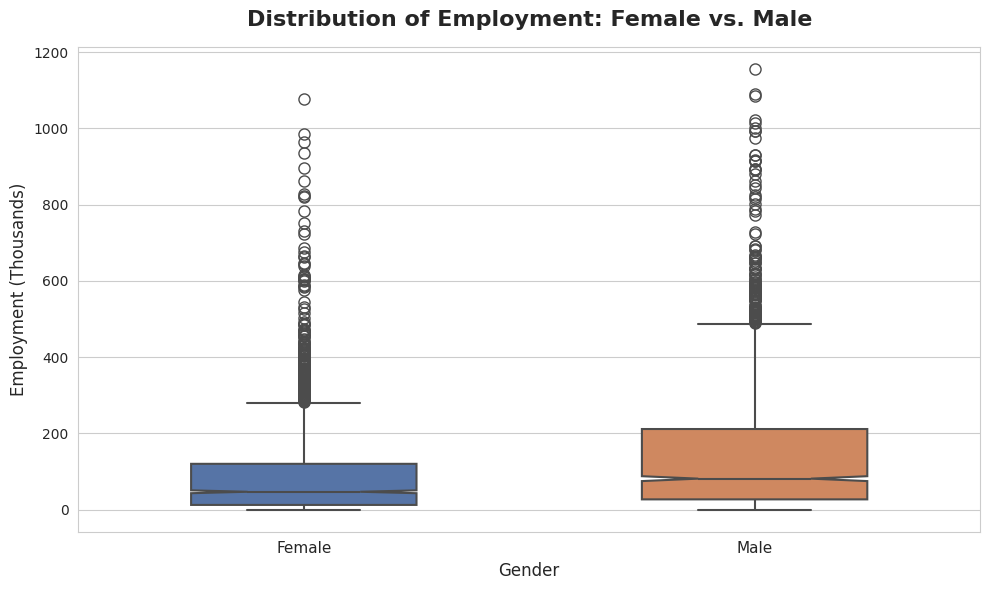

In [ ]:
# Set style (seaborn)
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10, 6))

# Create the boxplot with customizations
sns.boxplot(data=df[['Female', 'Male']],
            width=0.5,
            fliersize=8,
            linewidth=1.5,
            notch=True,
            saturation=0.8)

# Customize the plot
plt.title('Distribution of Employment: Female vs. Male', fontsize=16, pad=15, weight='bold')
plt.ylabel('Employment (Thousands)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=11)

# Emphasize outliers with a distinct style
for i, artist in enumerate(plt.gca().artists):
    # Customize outlier markers (fliers)
    for flier in artist.get_paths():
        plt.gca().collections[i].set_edgecolor('red')  # Red outline for outliers
        plt.gca().collections[i].set_facecolor('yellow')  # Yellow fill for contrast
        plt.gca().collections[i].set_alpha(0.7)  # Slight transparency

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

The box plot shows that while both genders have outliers in the 800K to 1,100K range, males have more of these high-employment outliers, likely due to their dominance in large-scale, labor-intensive industries or regions with significant economic activity. Females, while also showing outliers, are less frequent in these high-employment scenarios, possibly due to sectoral differences or societal factors limiting their participation in such contexts.



>> **Total Employment by Region**

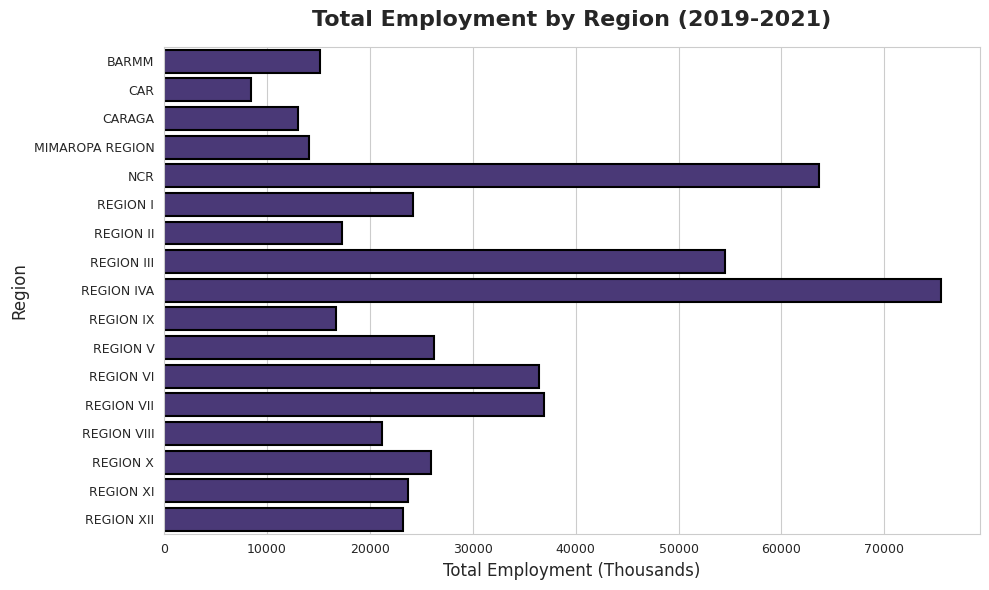

In [ ]:
# Aggregate total employment by region
df_region = df.groupby('Geolocation')['Total_Employment'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("viridis")  # Keep viridis palette as in original

# Create the figure
plt.figure(figsize=(10, 6))

# Seaborn bar plot
sns.barplot(data=df_region, x='Total_Employment', y='Geolocation',
            saturation=0.8, linewidth=1.5, edgecolor='black')

plt.title('Total Employment by Region (2019-2021)', fontsize=16, pad=15, weight='bold')
plt.xlabel('Total Employment (Thousands)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

Urban regions (e.g., REGION IVA) might have higher employment totals (e.g., 500K more jobs) compared to rural areas (e.g., REGION VIII), reflecting population density and economic activity differences.

>> **Comparison of Male and Female Employment through the Years**

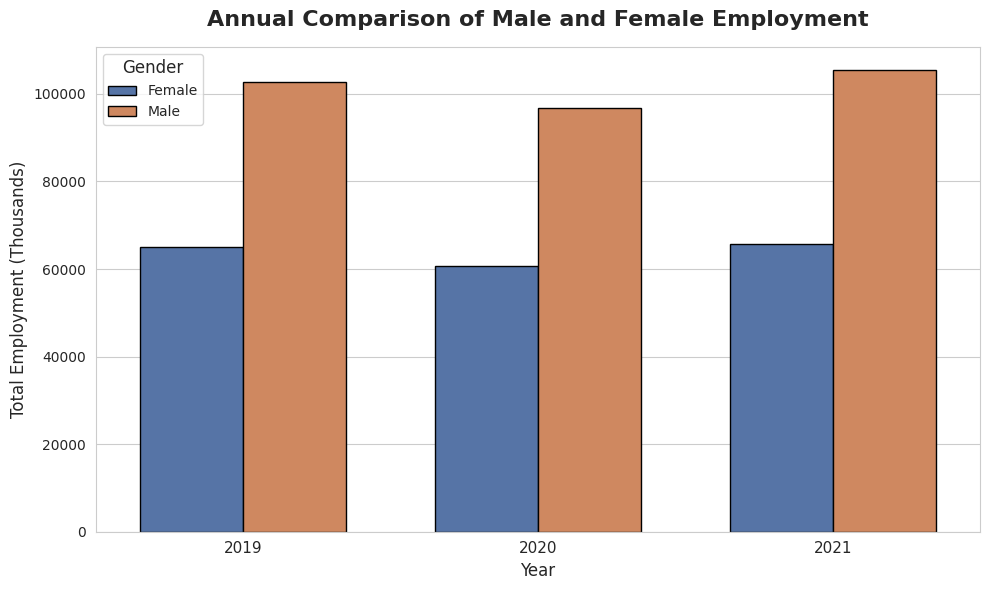

In [ ]:
# Aggregate by year
annual_data = df.groupby('Year').sum().reset_index()

# Melt for Seaborn
annual_data_melted = annual_data.melt(id_vars=['Year'], value_vars=['Female', 'Male'],
                                      var_name='Gender', value_name='Employment')

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure
plt.figure(figsize=(10, 6))

# Seaborn bar plot
sns.barplot(data=annual_data_melted, x='Year', y='Employment', hue='Gender',
            width=0.7, saturation=0.8, edgecolor='black')

plt.title('Annual Comparison of Male and Female Employment', fontsize=16, pad=15, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Employment (Thousands)', fontsize=12)
plt.xticks(fontsize=11)
plt.legend(title='Gender', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

Male employment might peak at in 2019 and 2021, dropping to almost 1,900 by 2019, while female employment could rise from 1,500 to 1,600, narrowing the gender gap over the period.

>>**Employment Trends by Quarter and Gender**

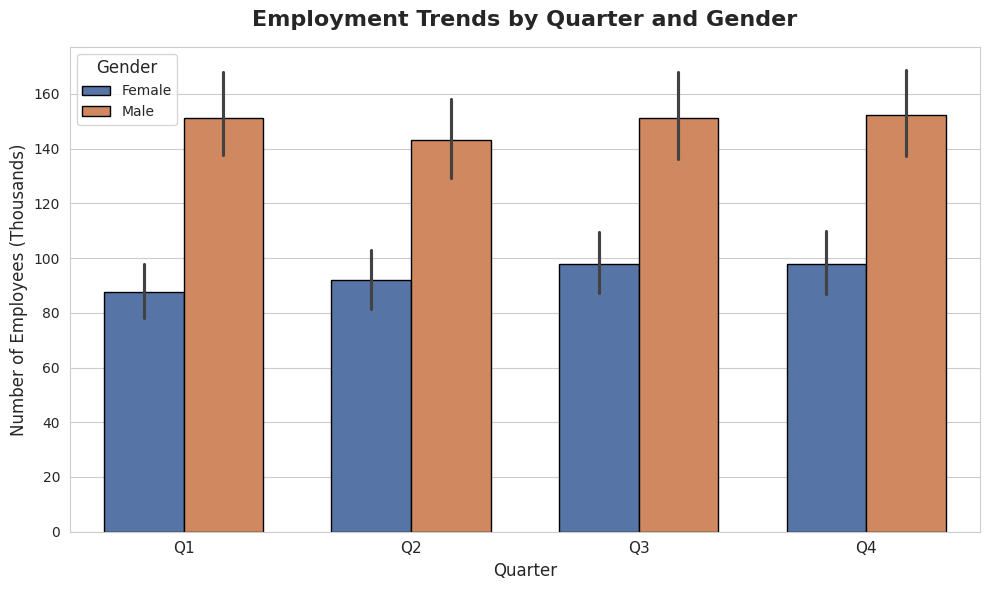

In [ ]:
# Melt the DataFrame for quarterly analysis
quarterly_df = df.melt(id_vars=['Quarter', 'Major Occupation'],
                       value_vars=['Female', 'Male'],
                       var_name='Gender',
                       value_name='Count')

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure
plt.figure(figsize=(10, 6))

# Seaborn bar plot
sns.barplot(data=quarterly_df, x='Quarter', y='Count', hue='Gender',
            width=0.7, saturation=0.8, edgecolor='black')

plt.title('Employment Trends by Quarter and Gender', fontsize=16, pad=15, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Employees (Thousands)', fontsize=12)
plt.xticks(fontsize=11)
plt.legend(title='Gender', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

The bar chart shows a consistent gender gap in employment, with males maintaining higher employment levels (150K) compared to females (90K to 100K) across all quarters. Females exhibit a slight upward trend (11% increase from Q1 to Q3), possibly due to growing opportunities in service-oriented sectors, while male employment remains stable with a minor dip in Q2. The gap narrows slightly from 60K in Q1 to 50K in Q2-Q4, reflecting modest gains in female employment. The small error bars suggest reliable data, but the larger variability in male employment in Q1 and Q2 might hint at sector-specific or regional fluctuations.

>> **Employment Trends Over Time Across All Regions**

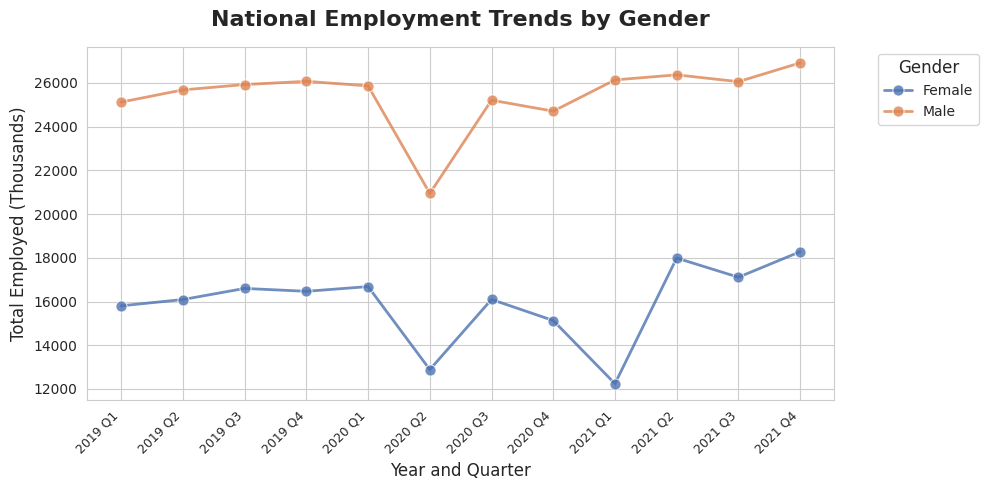

In [ ]:
# Create a time column combining Year and Quarter
df['Time'] = df['Year'].astype(str) + ' ' + df['Quarter']

# Aggregate totals by time (sum across all regions and occupations)
total_by_time = df.groupby('Time').agg({'Female': 'sum', 'Male': 'sum'}).reset_index()

# Melt the data for Seaborn (Female and Male into a single 'Gender' column)
total_by_time_melted = total_by_time.melt(id_vars=['Time'],
                                          value_vars=['Female', 'Male'],
                                          var_name='Gender',
                                          value_name='Employment')

# Set Seaborn style for consistency with the box plot
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure
plt.figure(figsize=(10, 5))

# Create the line plot with Seaborn
sns.lineplot(data=total_by_time_melted,
             x='Time',
             y='Employment',
             hue='Gender',
             marker='o',           # Circle markers for data points
             linewidth=2,          # Thicker lines for visibility
             markersize=8,         # Larger markers to stand out
             linestyle='-',        # Solid line style
             alpha=0.8)            # Slight transparency for polish

plt.title('National Employment Trends by Gender', fontsize=16, pad=15, weight='bold')
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Total Employed (Thousands)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)  # Rotate for readability

plt.legend(title='Gender', fontsize=10, title_fontsize=12,
           bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

Assuming a trend analysis, male employment might remain stable or slightly decline (e.g., -2% annually), while female employment could show a gradual increase (e.g., +3% annually) due to growing participation in the workforce.

>> **Trends in Employment Across Occupations Over Time**

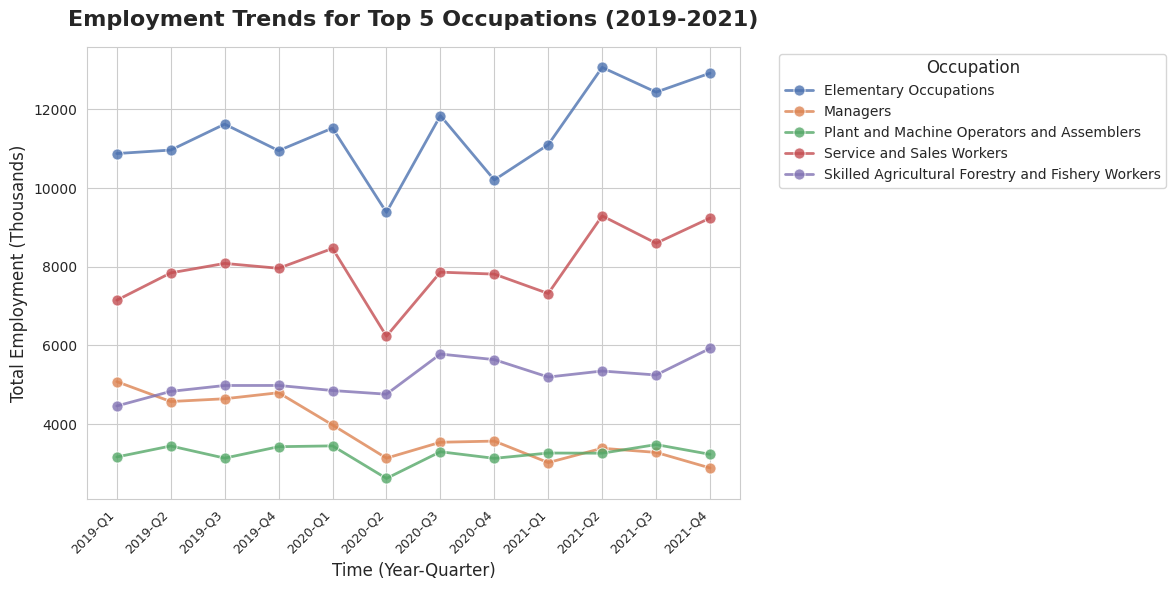

In [ ]:
# Create a 'Time' column
df['Time'] = df['Year'].astype(str) + '-' + df['Quarter'].astype(str)

# Aggregate total employment (Female + Male) by occupation and time
df['Total_Employment'] = df['Female'] + df['Male']
df_time = df.groupby(['Time', 'Major Occupation'])['Total_Employment'].sum().reset_index()

# Filter top 5 occupations
top_occupations = df_time.groupby('Major Occupation')['Total_Employment'].mean().nlargest(5).index
df_time_filtered = df_time[df_time['Major Occupation'].isin(top_occupations)]

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure
plt.figure(figsize=(12, 6))

# Seaborn line plot (already using sns.lineplot in original, just enhancing)
sns.lineplot(data=df_time_filtered, x='Time', y='Total_Employment', hue='Major Occupation',
             marker='o', linewidth=2, markersize=8, alpha=0.8)

plt.title('Employment Trends for Top 5 Occupations (2019-2021)', fontsize=16, pad=15, weight='bold')
plt.xlabel('Time (Year-Quarter)', fontsize=12)
plt.ylabel('Total Employment (Thousands)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.legend(title='Occupation', fontsize=10, title_fontsize=12,
           bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.show()

Top occupations (e.g., elementary, service and sales workers, agricultural, forestry, and fishery workers) might show growth, with elementary occupation potentially increasing by 5-10% due to demand, while managers and plant operators could decline by 3-5% due to automation.

>> **Employment Levels by Region and Occupation**

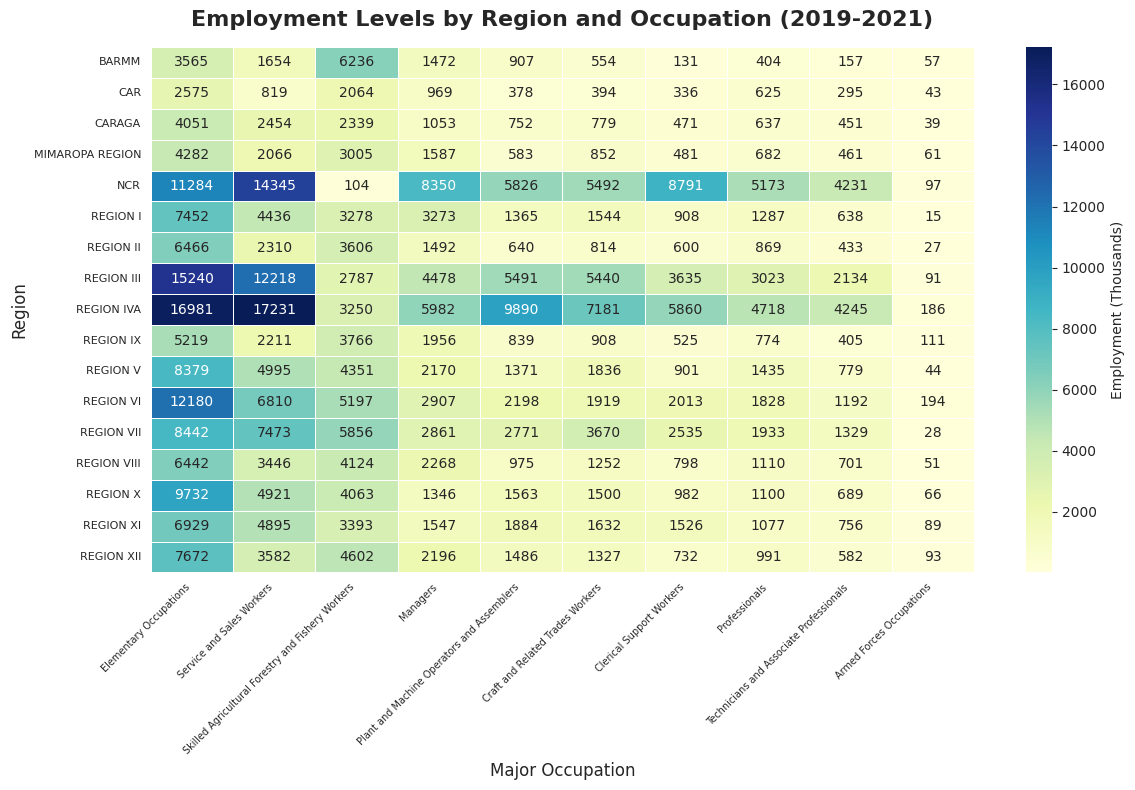

In [ ]:
# Aggregate total employment by region and occupation
df_total = df.groupby(['Geolocation', 'Major Occupation'])['Total_Employment'].sum().reset_index()

# Pivot the data for heatmap
df_pivot = df_total.pivot(index='Geolocation', columns='Major Occupation', values='Total_Employment')

# Filter top 10 occupations (in this case the data has only 9)
top_occupations = df_total.groupby('Major Occupation')['Total_Employment'].sum().nlargest(10).index
df_pivot_filtered = df_pivot[top_occupations]

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Seaborn heatmap
sns.heatmap(df_pivot_filtered, annot=True, fmt='.0f', cmap='YlGnBu',
            cbar_kws={'label': 'Employment (Thousands)'}, linewidths=0.5, annot_kws={"size": 10})

plt.title('Employment Levels by Region and Occupation (2019-2021)', fontsize=16, pad=15, weight='bold')
plt.xlabel('Major Occupation', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

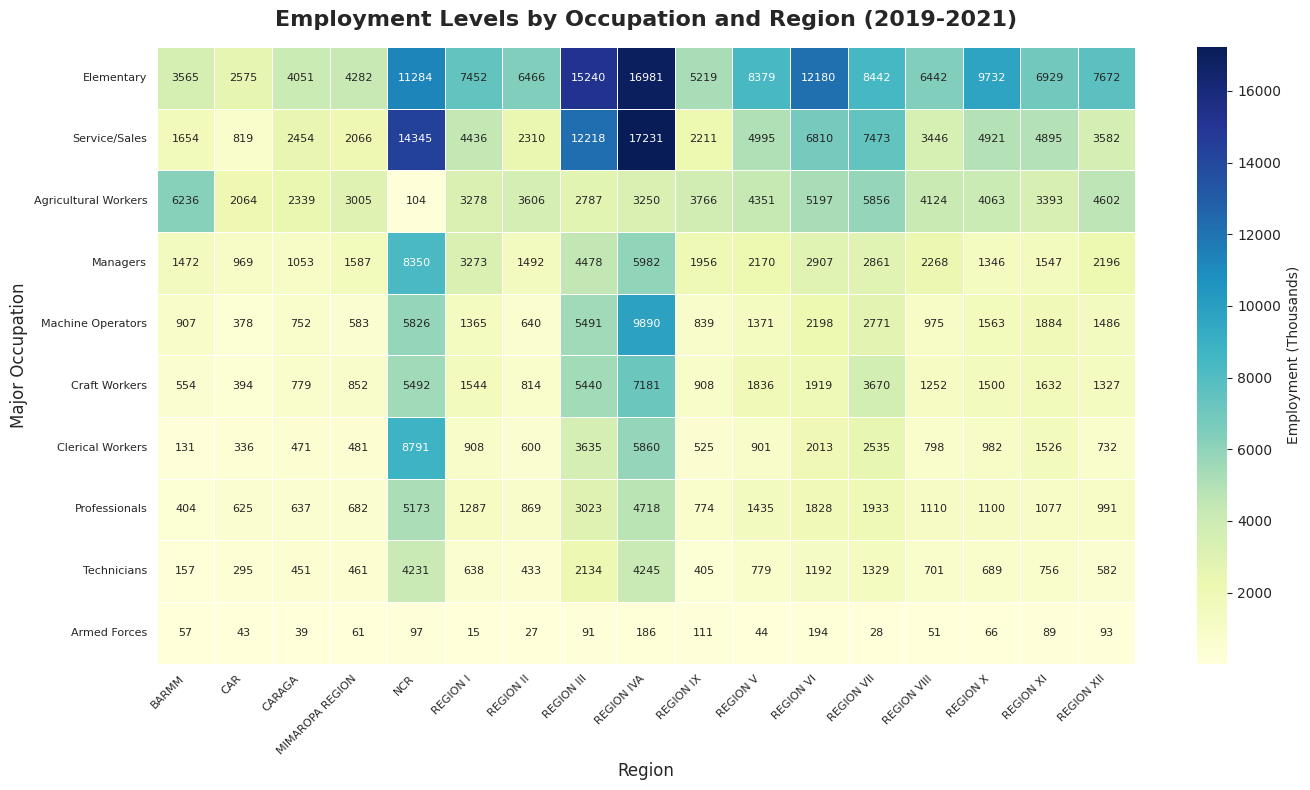

In [ ]:
# Aggregate total employment by region and occupation
df_total = df.groupby(['Geolocation', 'Major Occupation'])['Total_Employment'].sum().reset_index()

# Pivot the data for heatmap (swap index and columns to transpose)
df_pivot = df_total.pivot(index='Major Occupation', columns='Geolocation', values='Total_Employment')

# Filter top 10 occupations
top_occupations = df_total.groupby('Major Occupation')['Total_Employment'].sum().nlargest(10).index
df_pivot_filtered = df_pivot.loc[top_occupations]

# Shorten occupation names to prevent overlap (optional)
occupation_mapping = {
    'Armed Forces Occupations': 'Armed Forces',
    'Clerical Support Workers': 'Clerical Workers',
    'Elementary Occupations': 'Elementary',
    'Managers': 'Managers',
    'Plant and Machine Operators and Assemblers': 'Machine Operators',
    'Professionals': 'Professionals',
    'Service and Sales Workers': 'Service/Sales',
    'Skilled Agricultural Forestry and Fishery Workers': 'Agricultural Workers',
    'Technicians and Associate Professionals': 'Technicians',
    'Craft and Related Trades Workers': 'Craft Workers'
}
# Apply mapping to the index (since Major Occupation is now the index)
df_pivot_filtered.index = df_pivot_filtered.index.map(occupation_mapping)

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(14, 8))

# Seaborn heatmap
sns.heatmap(df_pivot_filtered,
            annot=True,
            fmt='.0f',
            cmap='YlGnBu',
            cbar_kws={'label': 'Employment (Thousands)'},
            linewidths=0.5,
            annot_kws={"size": 8})

plt.title('Employment Levels by Occupation and Region (2019-2021)', fontsize=16, pad=15, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Major Occupation', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

The heatmap reveals significant regional and occupational disparities in employment from 2019-2021. REGION I shows potential outliers in Elementary (15,240K) and Service/Sales (12,218K), which may indicate data errors or an unusually high concentration of low-skill and service jobs. BARMM leads in Agricultural Workers (6,236K), reflecting its agrarian economy, while REGION IVA excels in Professionals (5,179K), consistent with its urban, industrial character. CAR and CARAGA have lower employment overall, likely due to their smaller populations and less developed economies. The Armed Forces category is the smallest across all regions, as expected.

>> **Gender Disparity in Employment Across Occupations and Regions**

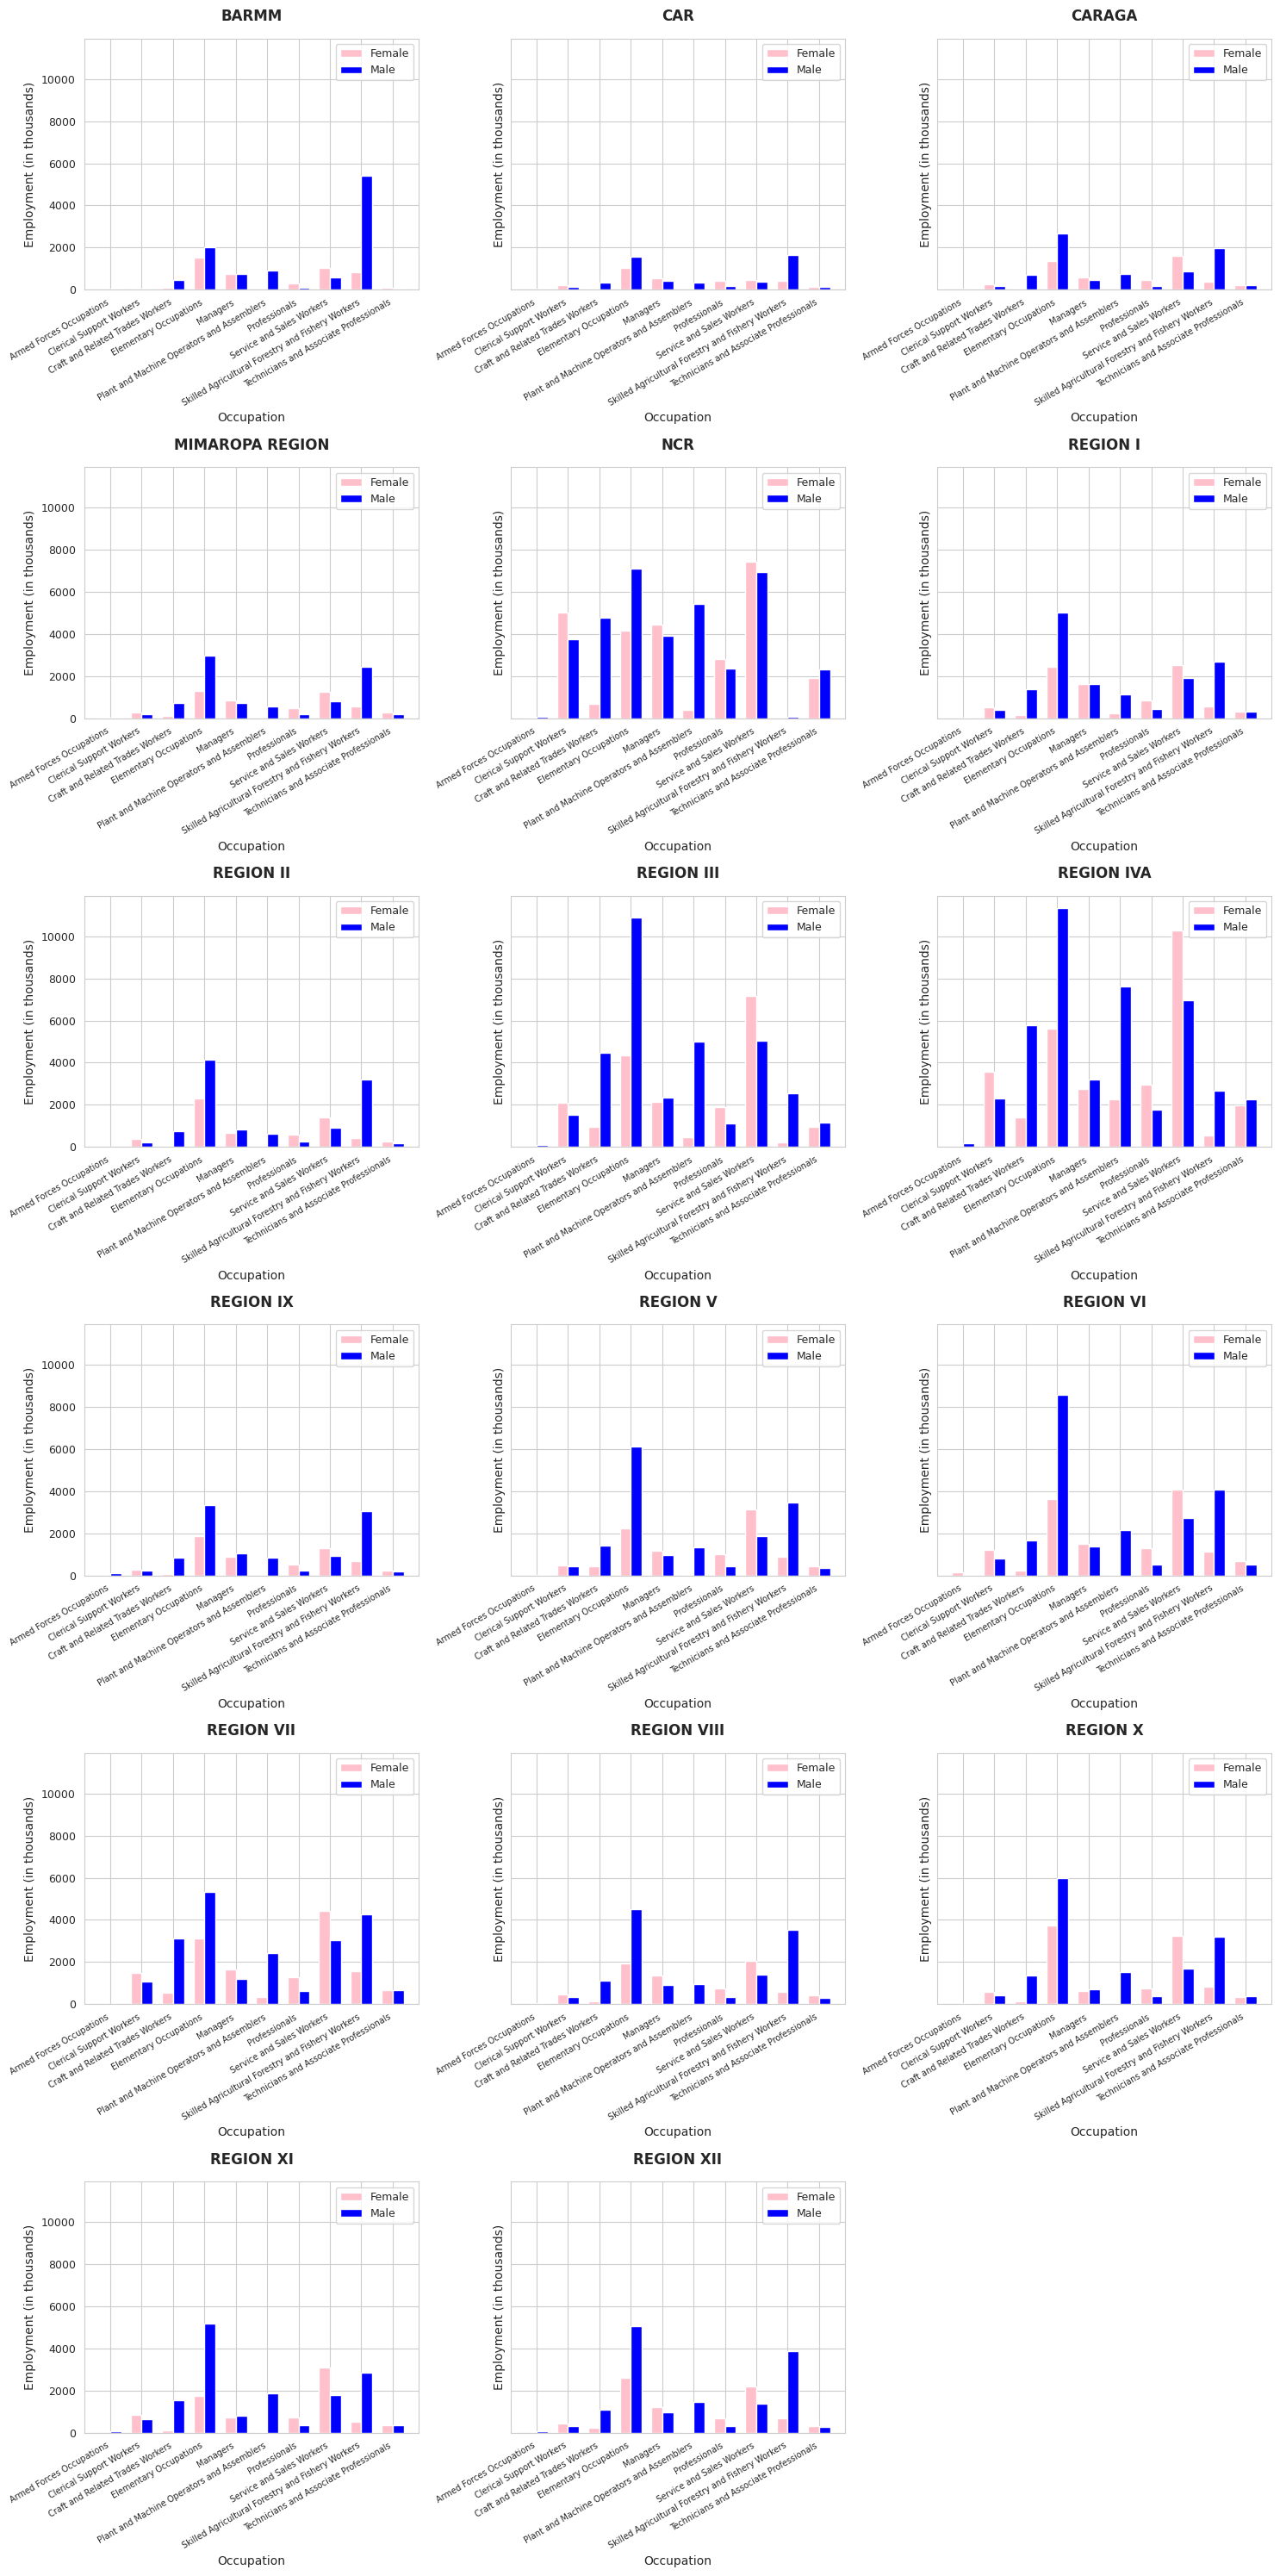

In [ ]:
# Get unique regions
regions = df['Geolocation'].unique()

# Calculate the number of rows and columns for the subplot grid
n_regions = len(regions)
n_cols = 3  # Adjust this based on how many plots per row you want
n_rows = (n_regions + n_cols - 1) // n_cols  # Ceiling division to determine rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Iterate over each region and create a bar plot
for i, region in enumerate(regions):
    # Filter data for the current region
    region_data = df[df['Geolocation'] == region]

    # Aggregate data by occupation
    aggregated = region_data.groupby('Major Occupation')[['Female', 'Male']].sum().reset_index()

    # Set up bar positions
    bar_width = 0.35
    x = range(len(aggregated['Major Occupation']))

    # Plot bars on the current subplot
    axes[i].bar(x, aggregated['Female'], bar_width, label='Female', color='pink')
    axes[i].bar([p + bar_width for p in x], aggregated['Male'], bar_width, label='Male', color='blue')

    # Customize the subplot
    axes[i].set_title(region, fontsize=12, pad=15, weight='bold')
    axes[i].set_xlabel('Occupation', fontsize=10)
    axes[i].set_ylabel('Employment (in thousands)', fontsize=10)
    axes[i].set_xticks([p + bar_width / 2 for p in x])
    axes[i].set_xticklabels(aggregated['Major Occupation'], rotation=30, ha='right', fontsize=7)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].legend(fontsize=9, title_fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Aggregate by year
annual_data = df.groupby('Year').sum().reset_index()

# Melt for Seaborn
annual_data_melted = annual_data.melt(id_vars=['Year'], value_vars=['Female', 'Male'],
                                      var_name='Gender', value_name='Employment')

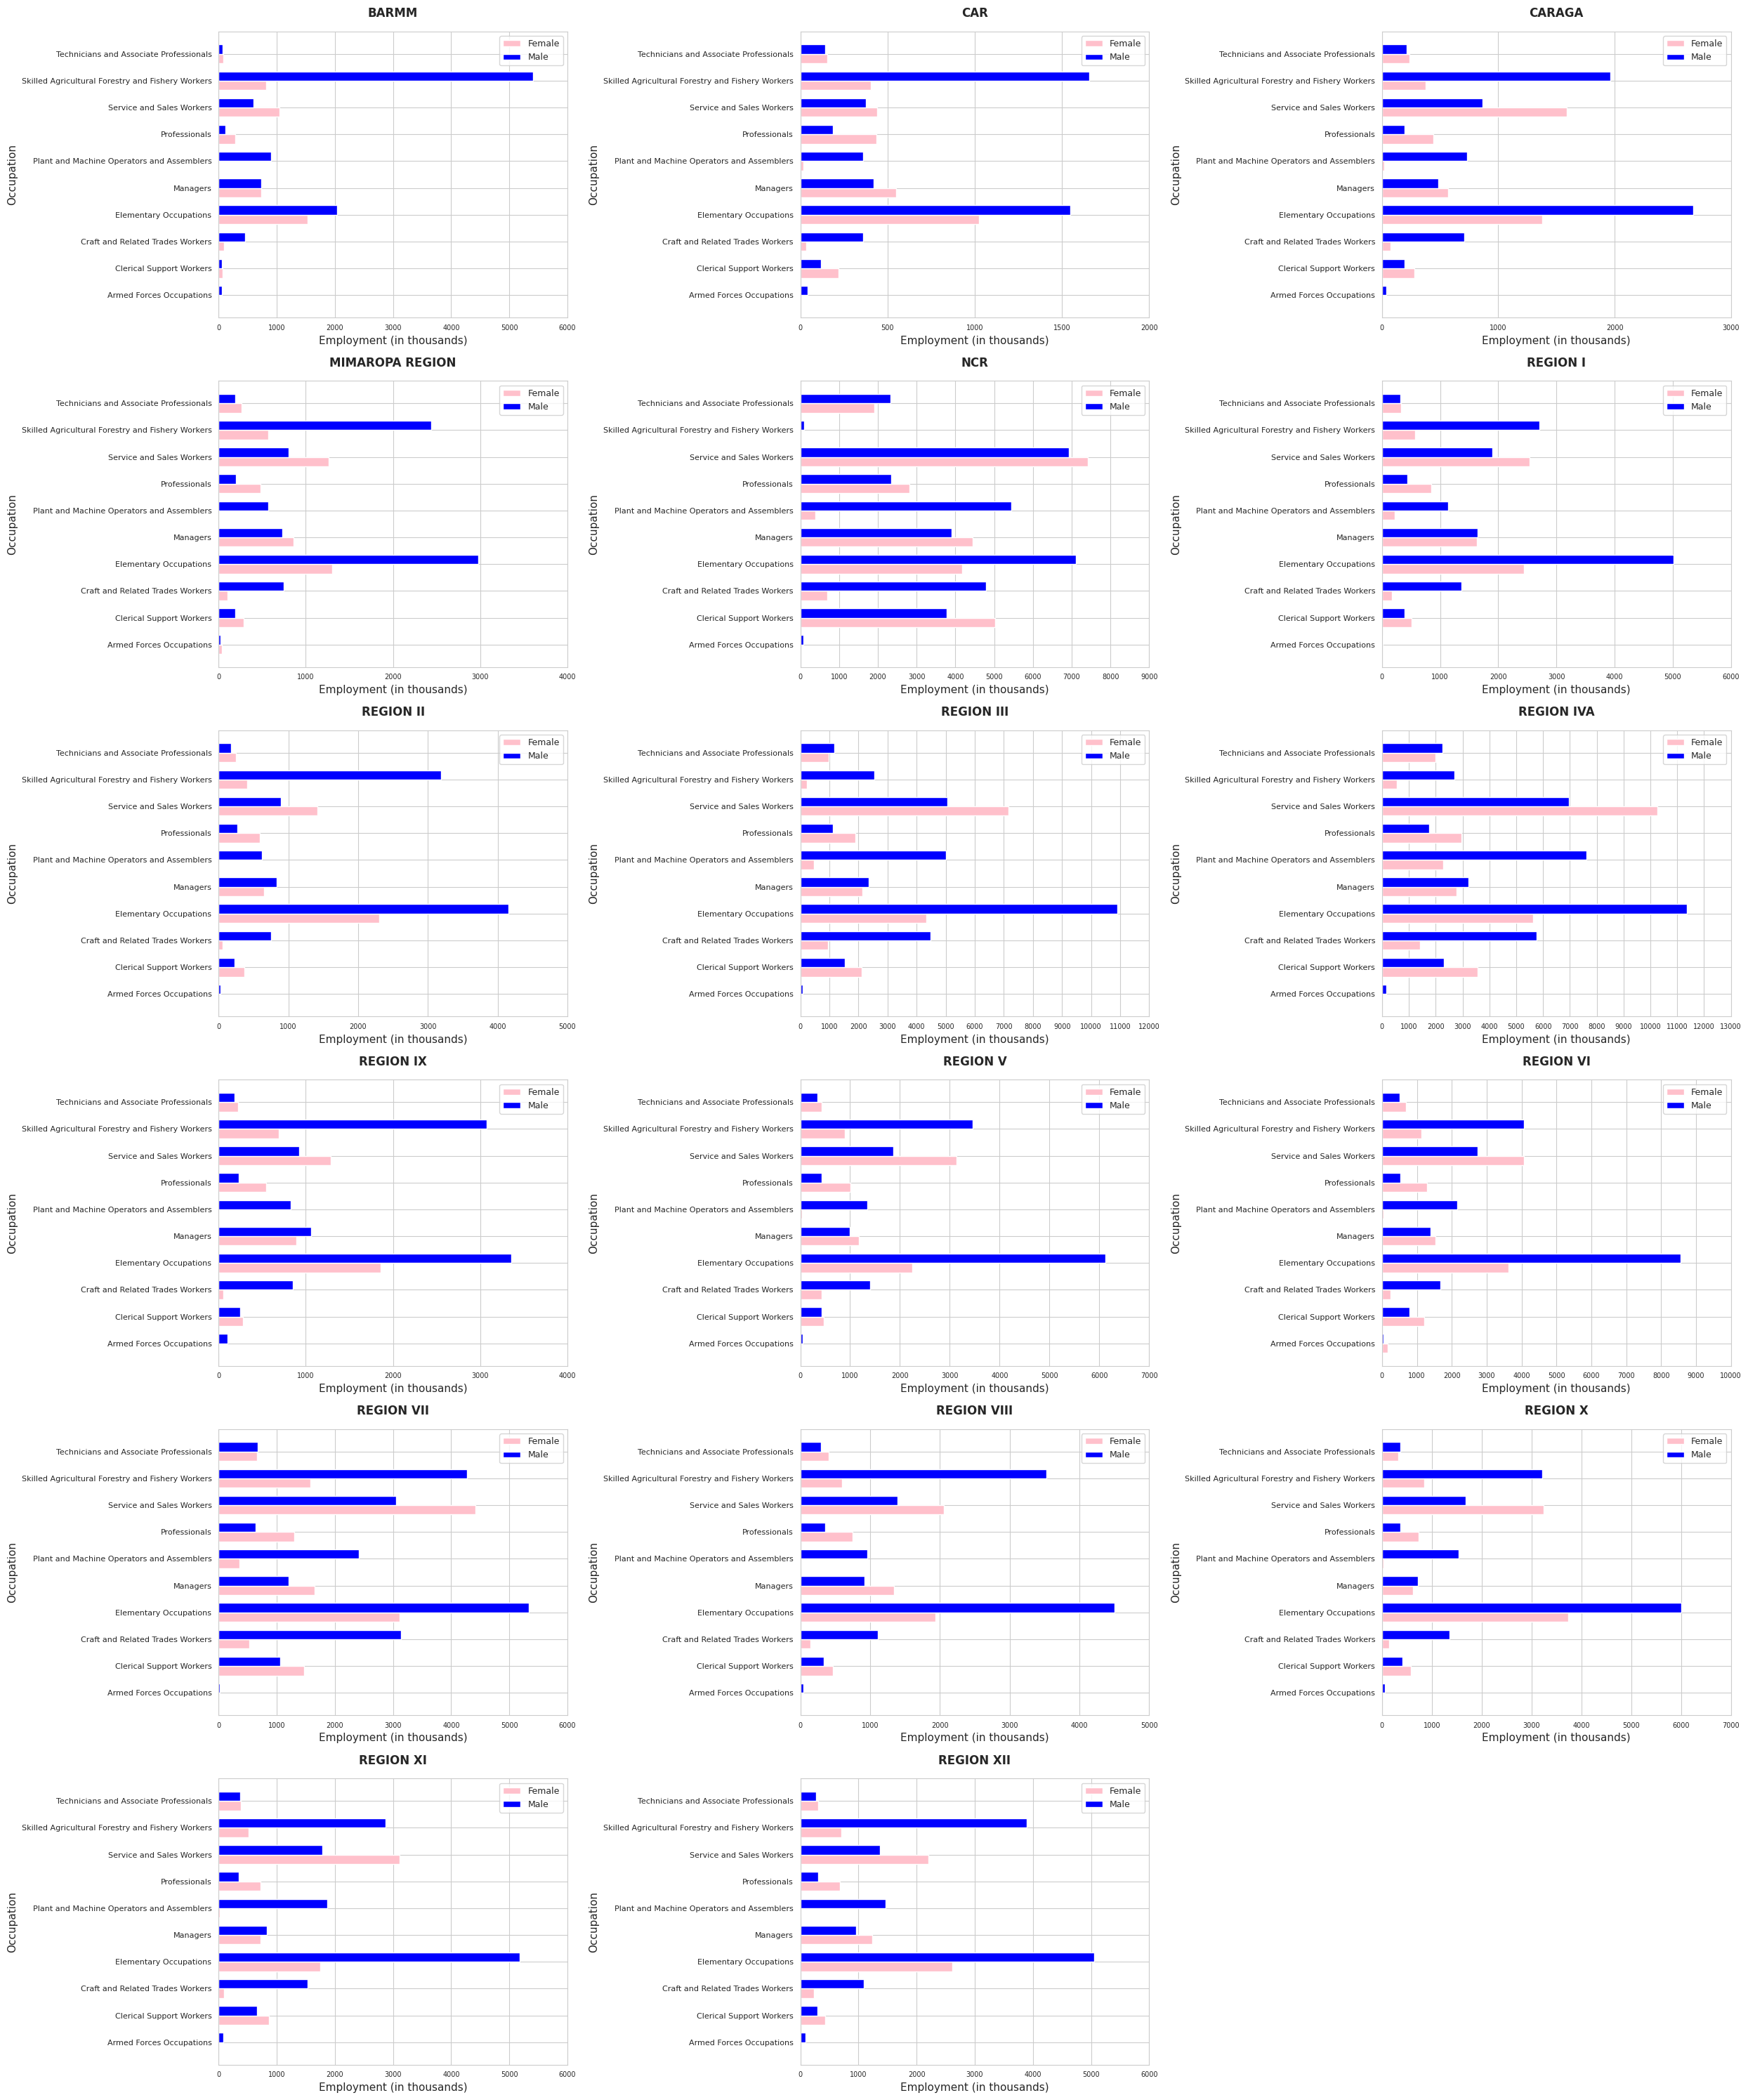

In [ ]:
# Get unique regions
regions = df['Geolocation'].unique()

# Calculate the number of rows and columns for the subplot grid
n_regions = len(regions)
n_cols = 3  # Adjust this based on how many plots per row you want
n_rows = (n_regions + n_cols - 1) // n_cols  # Ceiling division to determine rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows), sharex=False)  # Changed to sharex=False for individual limits
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Iterate over each region and create a horizontal bar plot
for i, region in enumerate(regions):
    # Filter data for the current region
    region_data = df[df['Geolocation'] == region]

    # Aggregate data by occupation
    aggregated = region_data.groupby('Major Occupation')[['Female', 'Male']].sum().reset_index()

    # Set up bar positions
    bar_height = 0.35  # You can increase this (e.g., 0.5) for thicker bars
    y = range(len(aggregated['Major Occupation']))

    # Plot horizontal bars and store the bar objects
    female_bars = axes[i].barh(y, aggregated['Female'], bar_height, label='Female', color='pink')
    male_bars = axes[i].barh([p + bar_height for p in y], aggregated['Male'], bar_height, label='Male', color='blue')

    # Calculate the maximum employment value for this region
    max_employment = max(aggregated['Female'].max(), aggregated['Male'].max())
    upper_limit = max_employment * 1.1  # Add 10% buffer for visibility

    # Set custom x-axis limit to make bars look bigger
    axes[i].set_xlim(0, upper_limit)

    # Set dynamic x-ticks in steps (e.g., every 500 or 1000, up to the max)
    step = 1000 if max_employment > 2000 else 500  # Adjust step size based on range
    ticks = range(0, int(upper_limit) + step, step)
    axes[i].set_xticks(ticks)

    # Customize the subplot
    axes[i].set_title(region, fontsize=12, pad=15, weight='bold')
    axes[i].set_xlabel('Employment (in thousands)', fontsize=11)
    axes[i].set_ylabel('Occupation', fontsize=11)
    axes[i].set_yticks([p + bar_height / 2 for p in y])
    axes[i].set_yticklabels(aggregated['Major Occupation'], fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)  # Adjust x-tick fontsize
    axes[i].legend(fontsize=9, title_fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* **Economic Activity:** Regions with higher employment (e.g., potentially REGION X, if its numbers are valid) might be more industrialized or urbanized (e.g., Northern Mindanao, which REGION X represents, includes cities like Cagayan de Oro). Professions like "Professionals" and "Plant and Machine Operators" suggest manufacturing or service-based economies.
* **Rural vs. Urban Divide:** Regions like CAR (Cordillera Administrative Region) or BARMM (Bangsamoro Autonomous Region in Muslim Mindanao) might have lower employment figures (if data were provided) due to more rural, agricultural economies with fewer formal jobs.
* **Highest Employment:** REGION X might have the highest employment among the listed regions if its figures (e.g., 6,000 for Professionals) are correct and unique to it, possibly due to a strong economic base.
* **Lowest Employment:** Without data, CAR or BARMM could hypothetically have lower employment due to smaller populations or less industrial activity, but this is speculative.
* **Reason for Variation:** Employment varies by region due to differences in population, economic development, urbanization, and industry focus (e.g., agriculture in CARAGA vs. manufacturing in REGION X).

sa quarterly heatmap, im thinking na remove na siya no?

>>**Quarterly Female Values Heatmap**

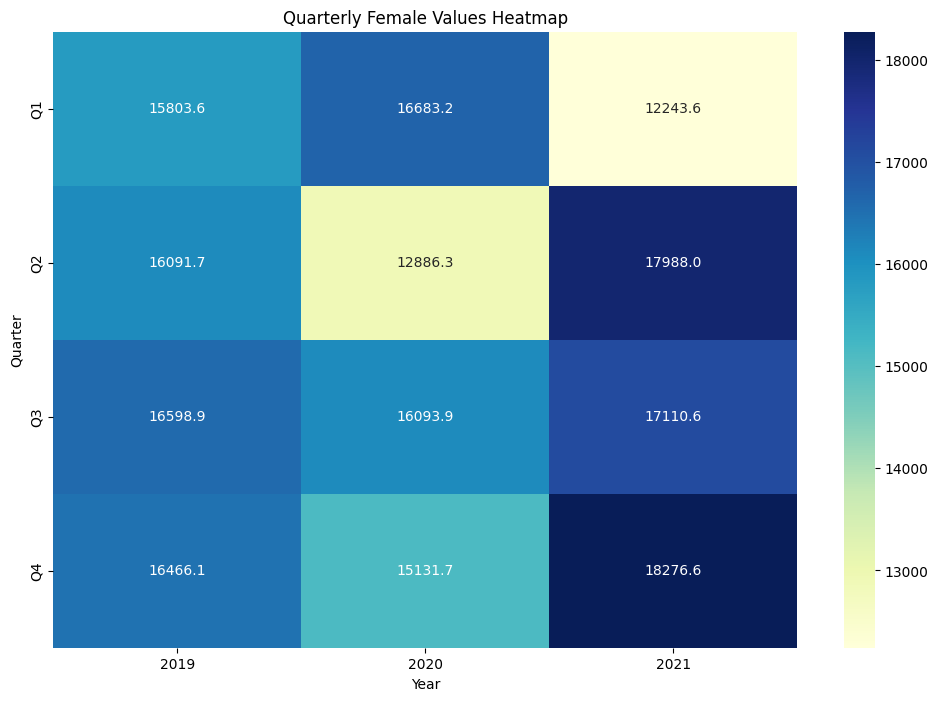

In [ ]:
quarterly_data = df.pivot_table(index="Quarter", columns="Year", values="Female", aggfunc='sum')  # Change to "Male" for male values

plt.figure(figsize=(12, 8))
sns.heatmap(quarterly_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Quarterly Female Values Heatmap')
plt.xlabel('Year')
plt.ylabel('Quarter')
plt.show()

>>**Quarterly Male Values Heatmap**

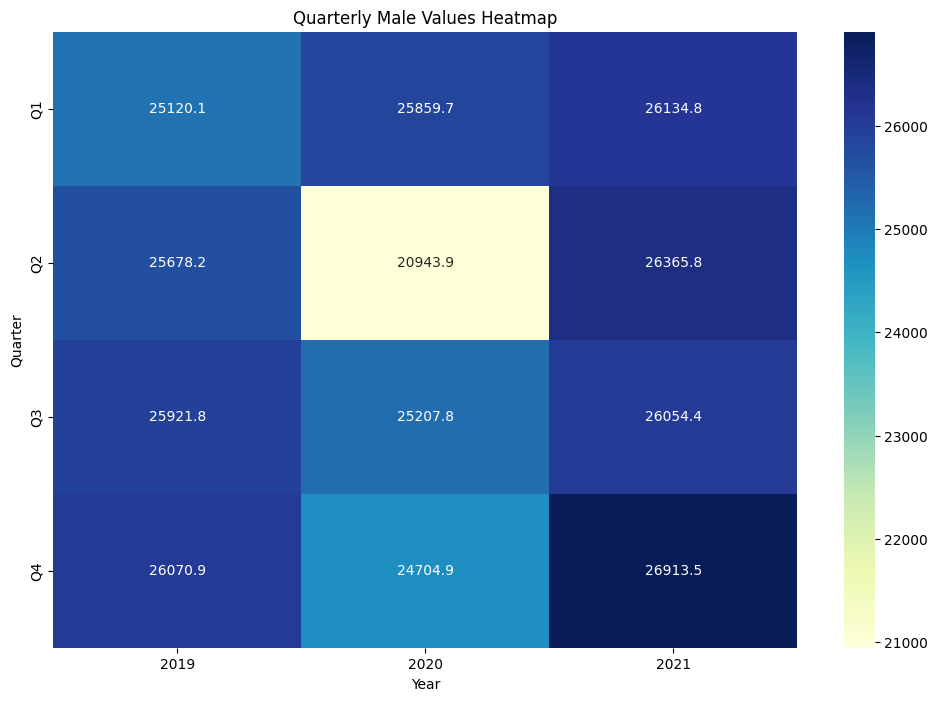

In [ ]:
quarterly_data = df.pivot_table(index="Quarter", columns="Year", values="Male", aggfunc='sum')  # Change to "Male" for male values

plt.figure(figsize=(12, 8))
sns.heatmap(quarterly_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Quarterly Male Values Heatmap')
plt.xlabel('Year')
plt.ylabel('Quarter')
plt.show()

**Correlation**

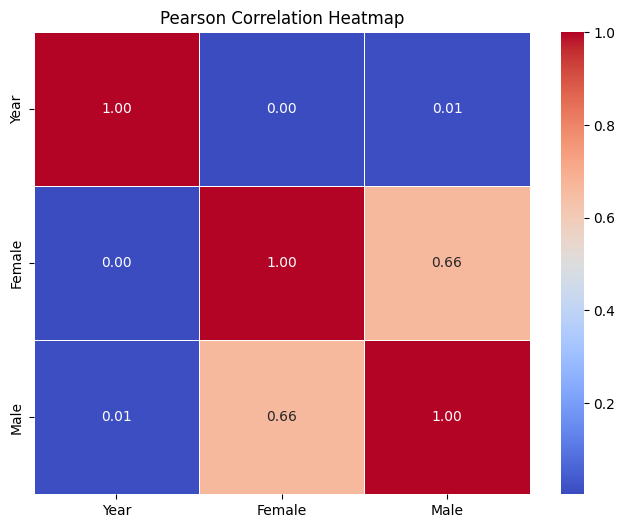

In [ ]:
# Loading dataset for Pearson Correlation
df_corr_p = pd.read_csv("data/Final_Test_Cleaned_DF.csv")

# Computing Pearson Correlation Matrix
corr_matrix = df_corr_p.select_dtypes(include=["number"]).corr(method="pearson")

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

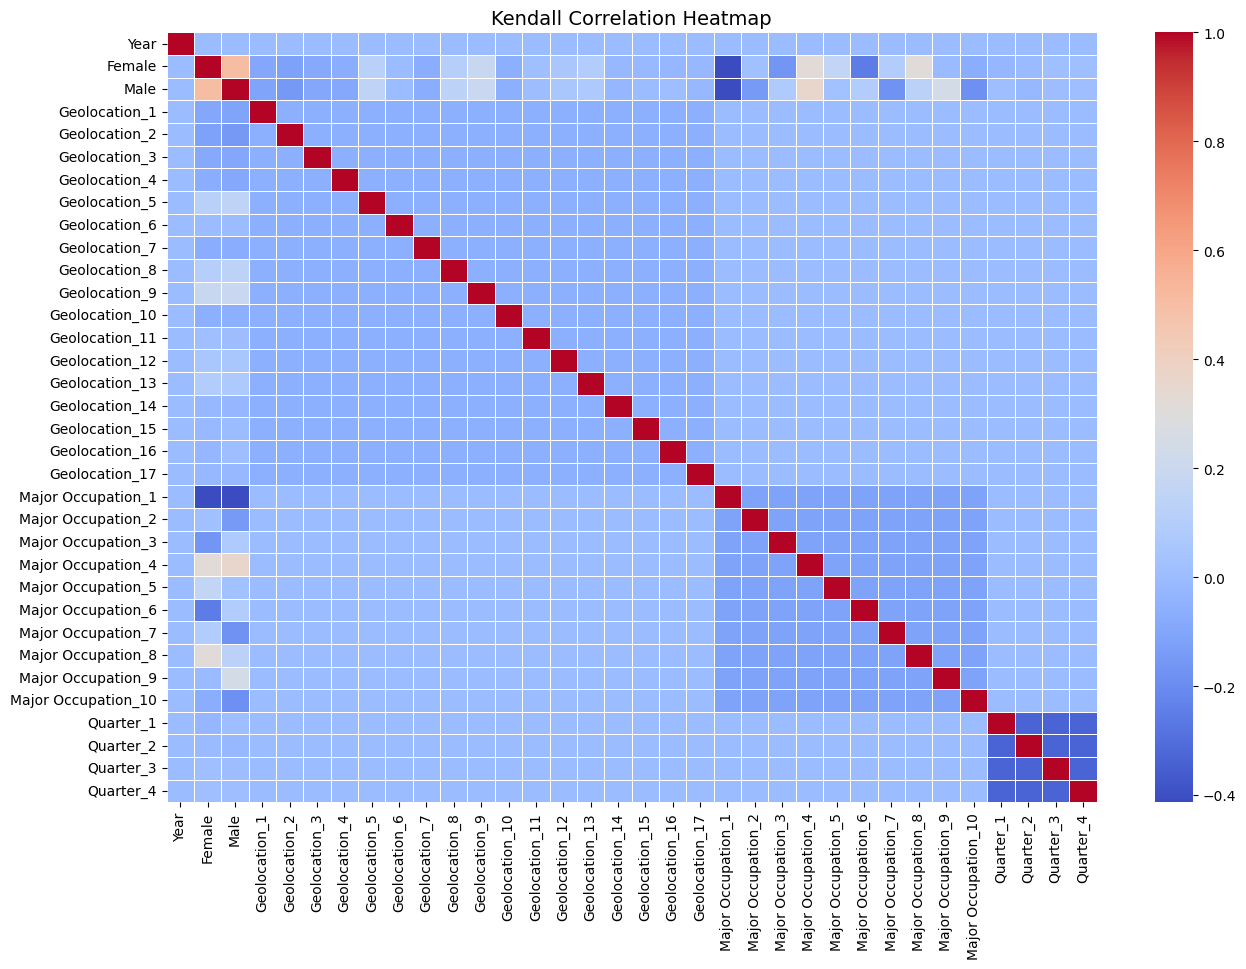

In [ ]:
# Loading dataset for Kendall Correlation
df_corr_k = pd.read_csv("data/Final_Test_Cleaned_DF.csv")

# One-Hot Encoding categorical columns
df_corr_encoded = pd.get_dummies(df_corr_k, columns=["Geolocation", "Major Occupation", "Quarter"])

# Computing Kendall Correlation Matrix
corr_matrix = df_corr_encoded.corr(method="kendall")

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Label readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Kendall Correlation Heatmap", fontsize=14)

plt.show()

In [ ]:
df["Geolocation"].unique()

array(['BARMM', 'CAR', 'CARAGA', 'MIMAROPA REGION', 'NCR', 'REGION I',
       'REGION II', 'REGION III', 'REGION IVA', 'REGION IX', 'REGION V',
       'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X', 'REGION XI',
       'REGION XII'], dtype=object)

In [ ]:
df["Major Occupation"].unique()

array(['Armed Forces Occupations', 'Clerical Support Workers',
       'Craft and Related Trades Workers', 'Elementary Occupations',
       'Managers', 'Plant and Machine Operators and Assemblers',
       'Professionals', 'Service and Sales Workers',
       'Skilled Agricultural Forestry and Fishery Workers',
       'Technicians and Associate Professionals'], dtype=object)

In [ ]:
# Ranking Regions based on GDP
regions = [
    "NCR", "REGION IVA", "REGION III", "REGION VII", "REGION XI", "REGION X", "REGION VI", "REGION I", "REGION V", "REGION XII",
    "REGION VIII", "REGION IX", "REGION II", "MIMAROPA REGION", "CARAGA", "CAR", "BARMM"
]

# Assigning Ranks
ranks = list(range(1, len(regions) + 1))

df_regions = pd.DataFrame({"Region": regions, "Rank": ranks})

# Ranking Occupations based on skill level
occupations = [
    "Professionals", "Managers", "Technicians and Associate Professionals", "Clerical Support Workers",
    "Service and Sales Workers", "SKilled Agricultural Forestry and Fishery Workers",
    "Plant and Machine Operators and Assemblers", "Craft and Related Trade Workers",
    "Elementary Occupations", "Armed Forces Occupations"
]

# Assigning Ranks
occupation_ranks = list(range(1, len(occupations) + 1))

df_occupations = pd.DataFrame({"Occupation": occupations, "Rank": occupation_ranks})

# Displaying ranked regions and occupations
print("Region Rankings:")
print(df_regions)
print("Occupation Rankings:")
print(df_occupations)

Region Rankings:
        Geolocation  Rank
0               NCR     1
1        REGION IVA     2
2        REGION III     3
3        REGION VII     4
4         REGION XI     5
5          REGION X     6
6         REGION VI     7
7          REGION I     8
8          REGION V     9
9        REGION XII    10
10      REGION VIII    11
11        REGION IX    12
12        REGION II    13
13  MIMAROPA REGION    14
14           CARAGA    15
15              CAR    16
16            BARMM    17
Occupation Rankings:
                                    Major Occupation  Rank
0                                      Professionals     1
1                                           Managers     2
2            Technicians and Associate Professionals     3
3                           Clerical Support Workers     4
4                          Service and Sales Workers     5
5  SKilled Agricultural Forestry and Fishery Workers     6
6         Plant and Machine Operators and Assemblers     7
7                    C

In [ ]:
df_corr_s[["Region_Rank", "Occupation_Rank"]].isna().sum()

Region_Rank          0
Occupation_Rank    204
dtype: int64

In [ ]:
# Ranking Geolocations based on GDP
regions = [
    "NCR", "REGION IVA", "REGION III", "REGION VII", "REGION XI", "REGION X", "REGION VI", "REGION I", "REGION V", "REGION XII",
    "REGION VIII", "REGION IX", "REGION II", "MIMAROPA REGION", "CARAGA", "CAR", "BARMM"
]

region_ranks = list(range(1, len(regions) + 1))
region_rank_dict = dict(zip(regions, region_ranks))

# Ranking Occupations based on skill level
occupations = [
    "Professionals", "Managers", "Technicians and Associate Professionals", "Clerical Support Workers",
    "Service and Sales Workers", "Skilled Agricultural Forestry and Fishery Workers",
    "Plant and Machine Operators and Assemblers", "Craft and Related Trade Workers",
    "Elementary Occupations", "Armed Forces Occupations"
]

occupation_ranks = list(range(1, len(occupations) + 1))
occupation_rank_dict = dict(zip(occupations, occupation_ranks))

# Loading dataset for Spearman Correlation
df_corr_s = pd.read_csv("data/Final_Test_Cleaned_DF.csv")

# Ensure regions and occupations are mapped correctly
df_corr_s["Region_Rank"] = df_corr_s["Geolocation"].map(region_rank_dict)
df_corr_s["Occupation_Rank"] = df_corr_s["Major Occupation"].map(occupation_rank_dict)

# Compute Spearman correlation matrix
corr_matrix = df_corr_s.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'BARMM'

#### **Application of Proximity**

>>**Euclidean Distance for the variation of Male and Female Employment across occupations**

In [ ]:
occupation_df = df.groupby('Major Occupation')[['Female', 'Male']].sum()

# Scale the 'Female' and 'Male' columns
scaler = StandardScaler()
employment_data_scaled = scaler.fit_transform(occupation_df)

# Compute the Euclidean distance matrix on scaled data
euclidean_dist_scaled = pairwise_distances(employment_data_scaled, metric='euclidean')

euclidean_df_scaled = pd.DataFrame(euclidean_dist_scaled, index=occupation_df.index, columns=occupation_df.index)

euclidean_df_scaled

Major Occupation,Armed Forces Occupations,Clerical Support Workers,Craft and Related Trades Workers,Elementary Occupations,Managers,Plant and Machine Operators and Assemblers,Professionals,Service and Sales Workers,Skilled Agricultural Forestry and Fishery Workers,Technicians and Associate Professionals
Major Occupation,,,,,,,,,,
Armed Forces Occupations,0.000000,1.134978,1.247036,4.420634,1.580975,1.360900,1.066705,3.574286,2.074720,0.640601
Clerical Support Workers,1.134978,0.000000,1.037113,3.481069,0.480268,1.196035,0.127013,2.439333,1.565233,0.510067
Craft and Related Trades Workers,1.247036,1.037113,0.000000,3.293433,1.097882,0.161491,1.114233,2.953927,0.832595,0.891825
Elementary Occupations,4.420634,3.481069,3.293433,0.000000,3.015380,3.261916,3.603518,2.189707,2.537804,3.830883
Managers,1.580975,0.480268,1.097882,3.015380,0.000000,1.231010,0.594697,2.016232,1.347820,0.940483
Plant and Machine Operators and Assemblers,1.360900,1.196035,0.161491,3.261916,1.231010,0.000000,1.275046,3.032962,0.753690,1.046259
Professionals,1.066705,0.127013,1.114233,3.603518,0.594697,1.275046,0.000000,2.515607,1.680232,0.471476
Service and Sales Workers,3.574286,2.439333,2.953927,2.189707,2.016232,3.032962,2.515607,0.000000,2.668795,2.941516
Skilled Agricultural Forestry and Fishery Workers,2.074720,1.565233,0.832595,2.537804,1.347820,0.753690,1.680232,2.668795,0.000000,1.633889


> In terms of gender employment across occupations, if it results in a larger Euclidean distance this equates to a more significant difference within the male and female employment distribution. On the other hand, values with smaller Euclidean distances mean more similar gender distribution patterns.

- Highest Distance values from "Elementary Occupations" to " Armed Forces Occupations"  (4.42)  stating a big difference in gender employment distribution
- Relatively similar gender distrubtion for "Managers" and "Clerical Support Workers" also "Professionals" and "Clerical Support Workers" (0.127)

>>**Euclidean Distance for employment trends throughout the years**

In [ ]:
year_df = df.groupby('Year')[['Female', 'Male']].sum()

# Scale the 'Female' and 'Male' columns
scaler = StandardScaler()
employment_data_scaled = scaler.fit_transform(year_df)

# Compute the Euclidean distance matrix on scaled data
euclidean_dist_scaled = pairwise_distances(employment_data_scaled, metric='euclidean')

euclidean_df_scaled = pd.DataFrame(euclidean_dist_scaled, index=year_df.index, columns=year_df.index)

euclidean_df_scaled

Year,2019,2020,2021
Year,,,
2019,0.000000,2.560421,0.793573
2020,2.560421,0.000000,3.288538
2021,0.793573,3.288538,0.000000


> This measures how different male and female employment numbers are between the years 2019, 2020, and 2021

- The largest distance resulting 3.288 is between 2020 and 2021. This indicates that employment rate between these years had a major shift, most possibly due to post-pandemic effects such as economic recovery or policy changes.
- The smallest distance, 0.793, is between 2019 and 2021 indicates that employment trends were much more similar in 2019 than 2020 due to employment structures returning pre-pandemic.

>>**Euclidean Distance for comparing the Region's gender employment distribution**

In [ ]:
region_df = df.groupby('Geolocation')[['Female', 'Male']].sum()

# Scale the 'Female' and 'Male' columns
scaler = StandardScaler()
employment_data_scaled = scaler.fit_transform(region_df)

# Compute the Euclidean distance matrix on scaled data
euclidean_dist_scaled = pairwise_distances(employment_data_scaled, metric='euclidean')

euclidean_df_scaled = pd.DataFrame(euclidean_dist_scaled, index=region_df.index, columns=region_df.index)

euclidean_df_scaled

Geolocation,BARMM,CAR,CARAGA,MIMAROPA REGION,NCR,REGION I,REGION II,REGION III,REGION IVA,REGION IX,REGION V,REGION VI,REGION VII,REGION VIII,REGION X,REGION XI,REGION XII
Geolocation,,,,,,,,,,,,,,,,,
BARMM,0.000000,0.527968,0.226806,0.160641,3.792887,0.724985,0.190943,3.018714,4.688883,0.152488,0.870343,1.649467,1.716205,0.481618,0.871233,0.659701,0.635458
CAR,0.527968,0.000000,0.345829,0.424748,4.263830,1.200050,0.670063,3.515673,5.165078,0.629259,1.356377,2.136406,2.186006,0.966876,1.339064,1.164735,1.126984
CARAGA,0.226806,0.345829,0.000000,0.081883,3.920827,0.854380,0.327983,3.169844,4.821342,0.288859,1.010549,1.790743,1.842136,0.621461,0.994158,0.821229,0.781591
MIMAROPA REGION,0.160641,0.424748,0.081883,0.000000,3.846662,0.777538,0.246529,3.091721,4.746482,0.207054,0.932600,1.713585,1.767542,0.542247,0.918772,0.740530,0.702314
NCR,3.792887,4.263830,3.920827,3.846662,0.000000,3.071626,3.613821,0.884931,0.904491,3.656049,2.922574,2.146358,2.079214,3.313253,2.928239,3.137454,3.157437
REGION I,0.724985,1.200050,0.854380,0.777538,3.071626,0.000000,0.542327,2.316197,3.970116,0.584536,0.159945,0.936367,0.992851,0.243396,0.146856,0.149432,0.107133
REGION II,0.190943,0.670063,0.327983,0.246529,3.613821,0.542327,0.000000,2.850016,4.511754,0.042232,0.693144,1.474699,1.535178,0.301189,0.687131,0.494696,0.459983
REGION III,3.018714,3.515673,3.169844,3.091721,0.884931,2.316197,2.850016,0.000000,1.709899,2.891922,2.159297,1.381378,1.356702,2.549847,2.180824,2.359242,2.390170
REGION IVA,4.688883,5.165078,4.821342,4.746482,0.904491,3.970116,4.511754,1.709899,0.000000,4.553983,3.819252,3.039723,2.979212,4.210758,3.827714,4.031290,4.053845


> It shows the Euclidean distance of different regions for identifying gender employment distribution

- The regions with smaller distances have similar gender employment. BARMM and REGION IX having 0.152488 distance indicates that there is little disparity in gender employment distribution.
- However, NCR and REGION IV-A and CAR and REGION IV-A have a large distance of 4.688883 and 5.165078,  indicates that they are very dissimilar in gender employment distribution possibly due to several factors.

#### **Association Rule Mining**